## Group Partner Names and Contact Details :

#### `Dhruv Bhatia`
 - M.No : +91-9997678633
 - Email ID : dhruv.bhatia563@yahoo.com
 
#### `Hetal Khanapure`
 - M.No : +91-9948251997
 - Email ID : hetu.parmar@gmail.com

### Credit - Exploratory Data Analysis - Case Study

#### Problem Statement : 

This case study aims to identify patterns which indicate :
 - If an applicant has difficulty in paying his/her installments which may be used for taking actions such as :
     - Denying the loan
     - Reducing the amount of loan
     - Lending (to risky applicants) at a higher interest rate, etc. 
     This will ensure that the consumers capable of repaying the loan are not rejected and the number of defaulters is also reduced.

###### Note : 
 - Financial Institution / Bank : wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
 - The bank can utilize this knowledge for its portfolio and risk assessment.

#### Provided Dataset 

Datasets:

1. `application_data.csv` contains all the information of the client at the time of application. The data is about whether a **client has payment difficulties.**

2. `previous_application.csv` contains information about the applicant’s previous loan data. It contains the data whether the previous application had been **Approved, Cancelled, Refused or Unused offer.**

3. `columns_description.csv` is data dictionary which elaborates the meaning of the variables.

### CASE 1 : Application Data Analysis

In this case, we have mainly focused on analyzing `application.csv` i.e. data about previous application of a client.

#### Approach for EDA over `application.csv` dataset :

 - Import Libraries
 - Reading the Dataset
 - Data Cleaning
     - Handling Missing Values
     - Type Casting
     - Fixing Rows and Columns
     - Handling Outliers
 - Univariate Analysis
 - Bivariate and Multivariate Analysis


##### Importing Libraries

In [1]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

##### Reading the Dataset

In [5]:
filepath_1 = "application_data.csv"
filepath_2 = "previous_application.csv"
application_df = pd.read_csv(filepath_1)
prev_ap_df = pd.read_csv(filepath_2)

### EDA for Application Data Frame

##### Inspecting The Dataframe

In [6]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# Checking the number of rows and columns in the dataframe
print("Application Dataset :")
print("Rows : ", application_df.shape[0])
print("Columns : ", application_df.shape[1])

Application Dataset :
Rows :  307511
Columns :  122


In [8]:
application_df.info() #to check for dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Check the summary for the numeric columns
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Observations :

 - Application Data Frame : 
     - 122 features
     - 307511 rows
     - 1 target variable
     - Out of that 65 features are float64, 41 features are integer, 16 features are object datatype.
     

##### Data Cleaning

In [10]:
# Percentage of null values in each column
# Function_name : NaN_per
# Usage : To return % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing features having missing values and % of missing values in those features

def NaN_per(df):
    missing = pd.DataFrame(columns=['features','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = ((df[col].isna().sum()/df.shape[0])*100).round(2)
            missing = missing.append({'features' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [11]:
NaN_app = NaN_per(application_df)

In [12]:
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
41,COMMONAREA_MEDI,69.87
13,COMMONAREA_AVG,69.87
27,COMMONAREA_MODE,69.87
49,NONLIVINGAPARTMENTS_MEDI,69.43
35,NONLIVINGAPARTMENTS_MODE,69.43
21,NONLIVINGAPARTMENTS_AVG,69.43
51,FONDKAPREMONT_MODE,68.39
33,LIVINGAPARTMENTS_MODE,68.35
47,LIVINGAPARTMENTS_MEDI,68.35
19,LIVINGAPARTMENTS_AVG,68.35


In [13]:
print(len(NaN_app))

67


Observations :
 - There are 67 features in application_df that have missing values.
 - Out of these having missing % greater than or equal to 50 will be drop from dataframe as they are large in number and will affect the analysis at further stage

In [14]:
# droping the columns with missing % >=50 from the 67 columns having missing %
unwanted = []
for i in range(67):
    if NaN_app["percentage"][i] >= 50.0:
        unwanted.append(NaN_app["features"][i])

In [15]:
unwanted  #columns having missing % >=50

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [16]:
application_df.drop(labels=unwanted,axis=1,inplace=True) #dropped all columns from 67 columns having null values more than 50%

In [17]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [18]:
NaN_app = NaN_per(application_df)

In [19]:
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
8,FLOORSMAX_AVG,49.76
10,FLOORSMAX_MODE,49.76
12,FLOORSMAX_MEDI,49.76
7,YEARS_BEGINEXPLUATATION_AVG,48.78
9,YEARS_BEGINEXPLUATATION_MODE,48.78
11,YEARS_BEGINEXPLUATATION_MEDI,48.78
13,TOTALAREA_MODE,48.27
14,EMERGENCYSTATE_MODE,47.40
3,OCCUPATION_TYPE,31.35
6,EXT_SOURCE_3,19.83


In [19]:
print(len(NaN_app))

26


In [20]:
# As we can see some columns null values are close to 50 % like (47-49)%
# droping the columns with missing % close to 50
unwanted = []
for i in range(26):
    if NaN_app["percentage"][i] >= 47.0:
        unwanted.append(NaN_app["features"][i])

In [21]:
unwanted

['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE']

In [22]:
application_df.drop(labels=unwanted,axis=1,inplace=True) #dropped all columns having missing % close to 50%

In [23]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

##### To Impute Missing Values In Some Columns

###### 1. Column - OCCUPATION_TYPE

In [24]:
application_df["OCCUPATION_TYPE"].isnull().sum()

96391

In [25]:
# impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

application_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
application_df.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [27]:
application_df.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [30]:
application_df[application_df['OCCUPATION_TYPE'].isnull()].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,NaN,1.0,0.0,1.0,0.0,-1133.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,NaN,0.0,0.0,0.0,0.0,-13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49645,157471,0,Cash loans,F,Y,N,0,3600000.0,953460.0,68791.5,900000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.016612,-9988,-865,-1353.0,-2642,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,17,1,1,1,1,1,1,Business Entity Type 3,0.588615,0.681706,0.0,0.0,0.0,0.0,-292.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
101007,217276,0,Revolving loans,M,Y,Y,0,3150000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-13386,-5564,-4028.0,-1031,1,1,1,1,1,0,NaN,2.0,1,1,FRIDAY,13,1,1,0,1,1,0,Trade: type 2,0.551281,0.574447,0.0,0.0,0.0,0.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
294892,441639,0,Revolving loans,F,N,Y,0,2250000.0,675000.0,33750.0,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-11691,-690,-130.0,-3776,1,1,0,1,0,0,NaN,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.735551,0.362277,0.0,0.0,0.0,0.0,-264.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132707,253920,0,Cash loans,F,N,Y,0,26460.0,101880.0,6763.5,90000.0,Unaccompanied,Pensioner,Lower secondary,Married,House / apartment,0.018209,-20695,365243,-12907.0,-2547,1,0,0,1,0,0,NaN,2.0,3,3,MONDAY,6,0,0,0,0,0,0,XNA,0.112708,NaN,0.0,0.0,0.0,0.0,-271.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
186643,316377,0,Cash loans,F,N,N,0,26100.0,54000.0,5391.0,54000.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.019101,-21469,365243,-7531.0,-4825,1,0,0,1,0,0,NaN,1.0,2,2,TUESDAY,12,0,0,0,0,0,0,XNA,0.600664,NaN,0.0,0.0,0.

In [31]:
# As we can see that most count comes under 'Laborers' category will fill the missing values with this in this column

# Filling missing value as 'Laborers' as most common value

application_df['OCCUPATION_TYPE'].fillna(application_df["OCCUPATION_TYPE"].mode()[0], inplace=True)

##### 2. Column - AMT_REQ_CREDIT_BUREAU_YEAR

In [32]:
# impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value '0'.
application_df["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

41519

In [33]:
application_df["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [34]:
application_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [35]:
# As we can see that most count comes under '0.0' category will fill the missing values with this in this column

# Filling missing value as '0.0' as most common value

application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0], inplace=True)

#### Note :
 - Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense.

##### 3. Column - AMT_REQ_CREDIT_BUREAU_MON

In [36]:
application_df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [37]:
application_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0], inplace=True)

##### 4. Column - AMT_REQ_CREDIT_BUREAU_WEEK

In [38]:
application_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [39]:
application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0], inplace=True)

##### 5. Column - AMT_REQ_CREDIT_BUREAU_DAY

In [40]:
application_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [41]:
application_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0], inplace=True)

##### 6. Column - AMT_REQ_CREDIT_BUREAU_HOUR

In [42]:
application_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [43]:
application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0], inplace=True)

##### 7. Column - AMT_REQ_CREDIT_BUREAU_QRT

In [44]:
application_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [45]:
application_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_df["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0], inplace=True)

##### 8. Column - AMT_GOODS_PRICE

In [46]:
application_df["AMT_GOODS_PRICE"].isnull().sum()

278

In [47]:
application_df["AMT_GOODS_PRICE"].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [48]:
# the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '450000'

application_df.AMT_GOODS_PRICE.median()

450000.0

In [49]:
application_df['AMT_GOODS_PRICE'].fillna(application_df["AMT_GOODS_PRICE"].median(), inplace=True)

##### 9. Column - AMT_ANNUITY

In [50]:
application_df["AMT_ANNUITY"].isnull().sum()

12

In [51]:
application_df["AMT_ANNUITY"].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

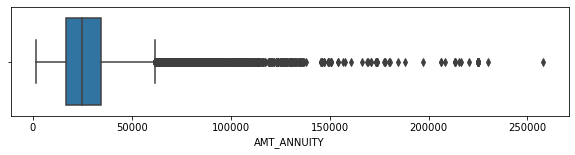

In [52]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [53]:
application_df.AMT_ANNUITY.median()

24903.0

In [54]:
print(application_df['AMT_ANNUITY'].describe(),"\n\n",application_df['AMT_ANNUITY'].quantile([0.5,0.7,0.9,0.95,0.99]))

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64 

 0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64


In [55]:
# Boxplot is showing the outliers for annuity, there are few entries having very large annuity and downpayment than others.
# Considering this entries will mislead the average value of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_ANNUITY

application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]

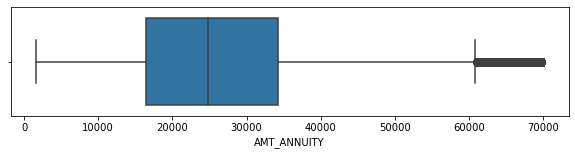

In [56]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

#### Errors in Data types and Data

In the cells shown below we have Changed the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which had negative or mixed values and imputed them with absolute values for our analysis.

In [57]:
# Checking the values present in columns starting with 'DAYS'
print(application_df['DAYS_BIRTH'].unique())
print(application_df['DAYS_EMPLOYED'].unique())
print(application_df['DAYS_REGISTRATION'].unique())
print(application_df['DAYS_ID_PUBLISH'].unique())
print(application_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [58]:
# The columns starting with 'DAYS'
days_col = [col for col in application_df if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [59]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
application_df[days_col]= abs(application_df[days_col])

In [60]:
print(application_df['DAYS_BIRTH'].unique())
print(application_df['DAYS_EMPLOYED'].unique())
print(application_df['DAYS_REGISTRATION'].unique())
print(application_df['DAYS_ID_PUBLISH'].unique())
print(application_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120.  291. 2531. ... 6194. 5854. 6211.]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [61]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,304418.000000,304418.000000,304418.000000,3.044180e+05,3.044180e+05,304418.000000,3.044180e+05,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304416.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,3.037620e+05,244239.000000,303401.000000,303401.000000,303401.000000,303401.000000,304417.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000,304418.000000
mean,278205.568590,0.081161,0.416864,1.669056e+05,5.908212e+05,26498.619144,5.302405e+05,0.020788,16035.299269,67950.204331,4989.138918,2994.029985,0.999997,0.819262,0.199407,0.998121,0.280571,0.056166,2.151536,2.055223,2.034446,12.056826,0.014891,0.050079,0.040145,0.078294,0.230827,0.179805,5.135615e-01,0.510345,1.425203,0.143945,1.408239,0.100431,962.052842,0.000043,0.710697,0.000076,0.015055,0.088428,0.000187,0.080117,0.003797,0.000023,0.003797,0.000007,0.003420,0.002779,0.001176,0.009868,0.000260,0.008045,0.000598,0.000499,0.000335,0.005535,0.006048,0.029676,0.230791,0.229543,1.645395
std,102806.640506,0.273083,0.721965,2.347801e+05,3.914707e+05,13032.387753,3.579393e+05,0.013716,4368.465515,139635.458339,3524.054474,1509.244927,0.001812,0.384802,0.399555,0.043307,0.449279,0.230243,0.910959,0.507073,0.500849,3.263017,0.121116,0.218109,0.196301,0.268634,0.421363,0.384026,1.911870e-01,0.194904,2.403963,0.447738,2.382770,0.363173,826.293861,0.006535,0.453440,0.008692,0.121772,0.283916,0.013682,0.271474,0.061506,0.004795,0.061506,0.002563,0.058378,0.052644,0.034273,0.098847,0.016107,0.089332,0.024444,0.022340,0.018302,0.077992,0.102781,0.190159,0.856374,0.745657,1.856580
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189135.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,12406.000000,931.000000,2014.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.

Gender Column

In [62]:
application_df.CODE_GENDER.value_counts()

F      200678
M      103736
XNA         4
Name: CODE_GENDER, dtype: int64

In [63]:
# Imputing the value'XNA' which means not available for the column 'CODE_GENDER'
# Replacing XNA value with F
application_df.loc[application_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
application_df.CODE_GENDER.value_counts()

F    200682
M    103736
Name: CODE_GENDER, dtype: int64

Organization Type

In [64]:
application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67082
XNA                       55009
Self-employed             38014
Other                     16503
Medicine                  11096
Business Entity Type 2    10473
Government                10321
School                     8820
Trade: type 7              7754
Kindergarten               6843
Construction               6615
Business Entity Type 1     5917
Transport: type 4          5331
Trade: type 3              3469
Industry: type 9           3328
Industry: type 3           3263
Security                   3217
Housing                    2937
Industry: type 11          2682
Military                   2589
Bank                       2482
Agriculture                2440
Police                     2308
Transport: type 2          2184
Postal                     2146
Security Ministries        1945
Trade: type 2              1868
Restaurant                 1800
Services                   1554
University                 1307
Industry: type 7           1295
Transpor

In [65]:
# Imputing the value'XNA' which means not available for the column 'ORGANIZATION_TYPE'
# Replacing XNA with 'Unknown'
application_df = application_df.replace('XNA','Unknown')

In [66]:
application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67082
Unknown                   55009
Self-employed             38014
Other                     16503
Medicine                  11096
Business Entity Type 2    10473
Government                10321
School                     8820
Trade: type 7              7754
Kindergarten               6843
Construction               6615
Business Entity Type 1     5917
Transport: type 4          5331
Trade: type 3              3469
Industry: type 9           3328
Industry: type 3           3263
Security                   3217
Housing                    2937
Industry: type 11          2682
Military                   2589
Bank                       2482
Agriculture                2440
Police                     2308
Transport: type 2          2184
Postal                     2146
Security Ministries        1945
Trade: type 2              1868
Restaurant                 1800
Services                   1554
University                 1307
Industry: type 7           1295
Transpor

##### Binning of continuous variables

In [67]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
application_df['AMT_INCOME_RANGE'] = pd.qcut(application_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_df['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [68]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
application_df['AMT_CREDIT_RANGE'] = pd.qcut(application_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_df['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4        MEDIUM
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [69]:
# Converting 'DAYS_BIRTH' to years
application_df['DAYS_BIRTH']= (application_df['DAYS_BIRTH']/365).astype(int)

In [70]:
application_df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [71]:
# Biining 'DAYS_BIRTH'
application_df['DAYS_BIRTH_BINS']=pd.cut(application_df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [72]:
application_df['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        183777
Young              75225
Senior_Citizen     29174
Very_Young         16242
Name: DAYS_BIRTH_BINS, dtype: int64

In [73]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304418 non-null  int64   
 1   TARGET                       304418 non-null  int64   
 2   NAME_CONTRACT_TYPE           304418 non-null  object  
 3   CODE_GENDER                  304418 non-null  object  
 4   FLAG_OWN_CAR                 304418 non-null  object  
 5   FLAG_OWN_REALTY              304418 non-null  object  
 6   CNT_CHILDREN                 304418 non-null  int64   
 7   AMT_INCOME_TOTAL             304418 non-null  float64 
 8   AMT_CREDIT                   304418 non-null  float64 
 9   AMT_ANNUITY                  304418 non-null  float64 
 10  AMT_GOODS_PRICE              304418 non-null  float64 
 11  NAME_TYPE_SUITE              303140 non-null  object  
 12  NAME_INCOME_TYPE             304418 non-null

In [74]:
NaN_app = NaN_per(application_df)

In [75]:
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
3,EXT_SOURCE_3,19.77
0,NAME_TYPE_SUITE,0.42
4,OBS_30_CNT_SOCIAL_CIRCLE,0.33
5,DEF_30_CNT_SOCIAL_CIRCLE,0.33
6,OBS_60_CNT_SOCIAL_CIRCLE,0.33
7,DEF_60_CNT_SOCIAL_CIRCLE,0.33
2,EXT_SOURCE_2,0.22
1,CNT_FAM_MEMBERS,0.00
8,DAYS_LAST_PHONE_CHANGE,0.00


Observations :
 - As we can see the missing % is quite very low now, we can start with the Analysis approach

##### Checkign Data Imbalance

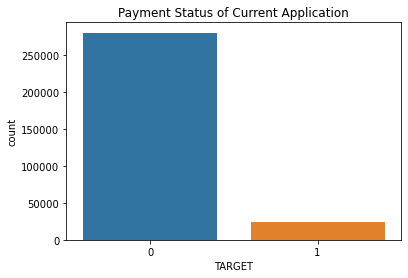

In [76]:
plt.title("Payment Status of Current Application")
sns.countplot(application_df['TARGET'])
plt.show()

In [77]:
# To find Data Imbalance Ratio

non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("\nNo. of non-defaulters: ", non_default.shape[0])
print("\nPercentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

No. of defaulters:  24707

No. of non-defaulters:  279711

Percentage of defaulters:  8.116142935043262


Observations :
 - Data is highly imbalanced as number of defaulter is very less in total population. 
 - Data Imbalance Ratio = Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

In [78]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304418 non-null  int64   
 1   TARGET                       304418 non-null  int64   
 2   NAME_CONTRACT_TYPE           304418 non-null  object  
 3   CODE_GENDER                  304418 non-null  object  
 4   FLAG_OWN_CAR                 304418 non-null  object  
 5   FLAG_OWN_REALTY              304418 non-null  object  
 6   CNT_CHILDREN                 304418 non-null  int64   
 7   AMT_INCOME_TOTAL             304418 non-null  float64 
 8   AMT_CREDIT                   304418 non-null  float64 
 9   AMT_ANNUITY                  304418 non-null  float64 
 10  AMT_GOODS_PRICE              304418 non-null  float64 
 11  NAME_TYPE_SUITE              303140 non-null  object  
 12  NAME_INCOME_TYPE             304418 non-null

### Analysis

##### Documents Submitted by Applicant

 - To analyze `'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21'` columns.
 - Aim to understand trend of document submission and its impact on TARGET variable(if any).

Starting Index :  47

Ending Index :  67



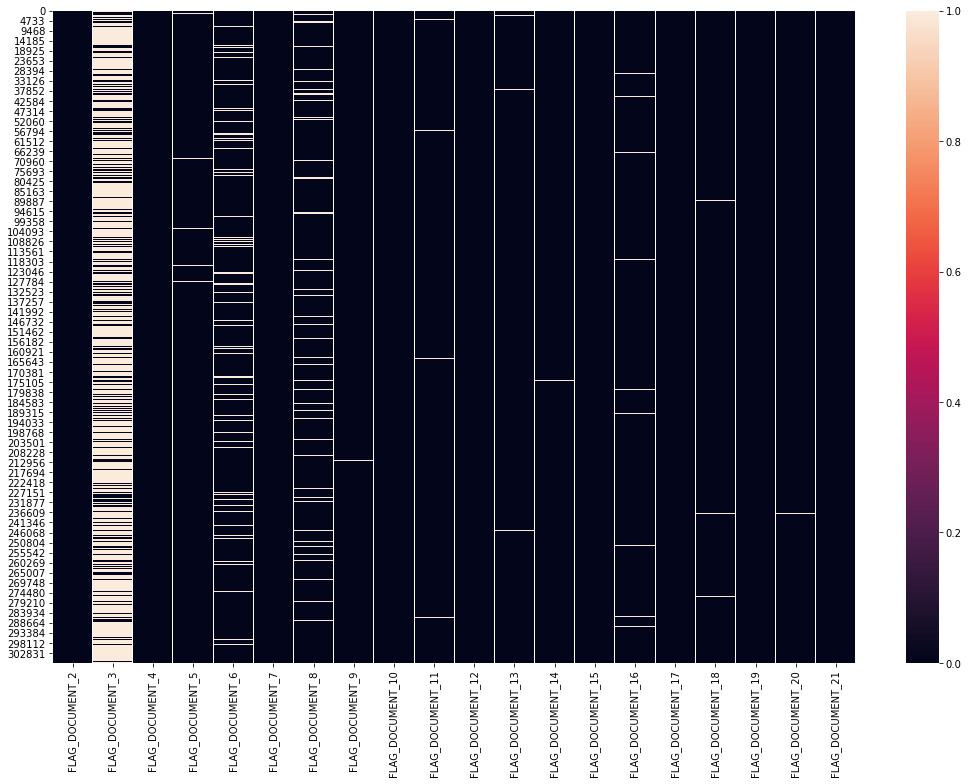

In [79]:
starting_idx = application_df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_df.columns.get_loc("FLAG_DOCUMENT_21")+1
print("Starting Index : ", starting_idx)
print("\nEnding Index : ", ending_idx)
print()
plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,starting_idx:ending_idx])
plt.show()

Observations :
 - The heatmap shows that all of the documents except Document 3 were not provided by clients in majority of the cases.
 - Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

In [80]:
# To remove unwanted columns from this dataset

unwanted=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
          'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_df.drop(labels=unwanted,axis=1,inplace=True)

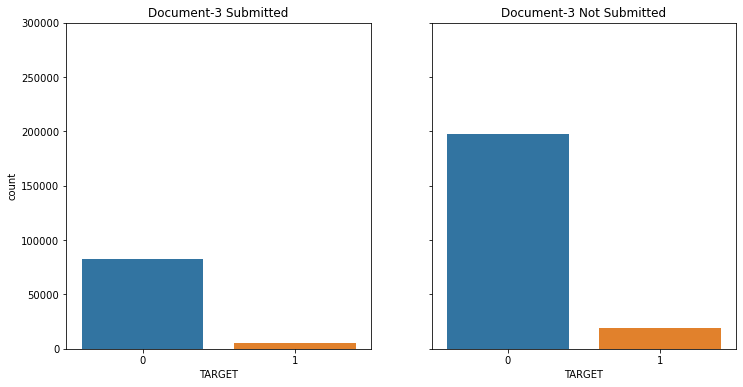

In [81]:
# Checking both defaulter and non-defaulter entries to identify importance of Document 3

fig = plt.figure(figsize=(12,6))

# putting ylim same for better visibility

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,300000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,300000), title="Document-3 Not Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)

g1 = sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"],ax=ax2)
g1.set(yticklabels=[])  # remove the tick labels
g1.set(ylabel=None)  # remove the axis label

plt.show()

Observations :
 - `FLAG_DOCUMENT_3` - similar trend for both non-defaulters and defaulters.Therefore this column can be dropped.

In [82]:
# To remove unwanted columns from this dataset

unwanted=['FLAG_DOCUMENT_3']

application_df.drop(labels=unwanted,axis=1,inplace=True)

In [83]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304418 non-null  int64   
 1   TARGET                       304418 non-null  int64   
 2   NAME_CONTRACT_TYPE           304418 non-null  object  
 3   CODE_GENDER                  304418 non-null  object  
 4   FLAG_OWN_CAR                 304418 non-null  object  
 5   FLAG_OWN_REALTY              304418 non-null  object  
 6   CNT_CHILDREN                 304418 non-null  int64   
 7   AMT_INCOME_TOTAL             304418 non-null  float64 
 8   AMT_CREDIT                   304418 non-null  float64 
 9   AMT_ANNUITY                  304418 non-null  float64 
 10  AMT_GOODS_PRICE              304418 non-null  float64 
 11  NAME_TYPE_SUITE              303140 non-null  object  
 12  NAME_INCOME_TYPE             304418 non-null

##### Housing Information of Applicant

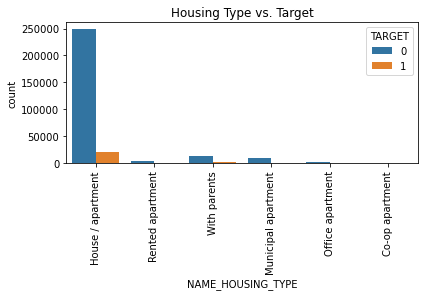

In [84]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [85]:
# For calculating total % of defaulters in application

def defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [86]:
defaulter_percentage(application_df, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.373477
2,With parents,11.710062
3,Municipal apartment,8.583536
5,Co-op apartment,7.996406
0,House / apartment,7.839354
4,Office apartment,6.602317


Observations :
 - Most of the clients live in House/Apartment
 - Clients living with their parents or in rented apartment have higher rate of default.

##### Social Circle Info

In [87]:
start_idx = application_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_df.iloc[:, start_idx:end_idx+1]

In [88]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  303401 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  303401 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  303401 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  303401 non-null  float64
dtypes: float64(4)
memory usage: 21.6 MB


In [89]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,303401.000000,303401.000000,303401.000000,303401.000000
mean,1.425203,0.143945,1.408239,0.100431
std,2.403963,0.447738,2.382770,0.363173
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


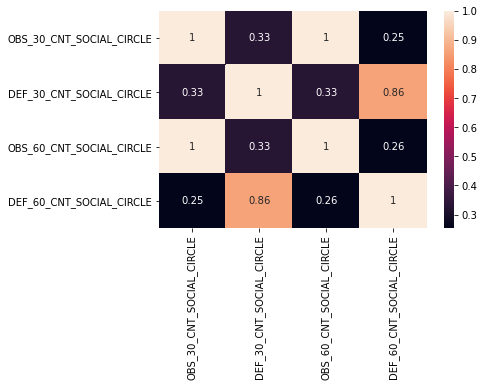

In [90]:
sns.heatmap(social_circle_df.corr(), annot=True)
plt.show()

Observations :
 - DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
 - OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

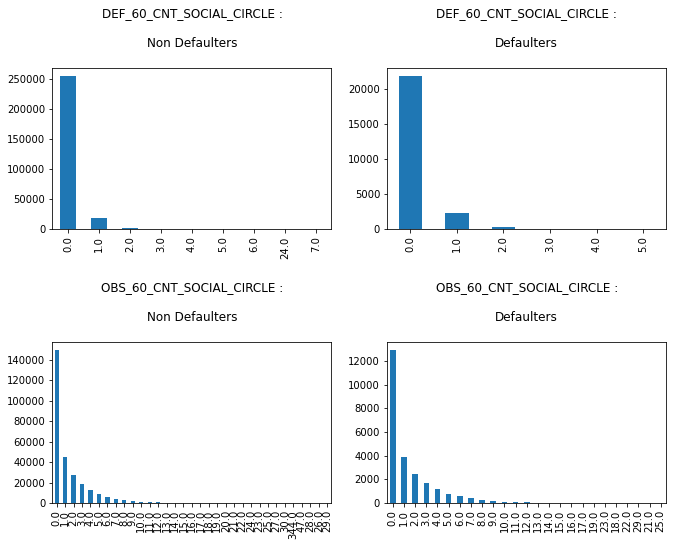

In [91]:
fig=plt.subplots(figsize=(11,8))
plt.subplots_adjust(hspace = 0.7)
plt.subplot(2, 2, 1)
non_default["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().plot(kind='bar',title='DEF_60_CNT_SOCIAL_CIRCLE :\n\nNon Defaulters\n')
plt.subplot(2, 2, 2)
default["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().plot(kind='bar',title='DEF_60_CNT_SOCIAL_CIRCLE :\n\nDefaulters\n')
plt.subplot(2, 2, 3)
non_default["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts().plot(kind='bar',title='OBS_60_CNT_SOCIAL_CIRCLE :\n\nNon Defaulters\n')
plt.subplot(2, 2, 4)
default["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts().plot(kind='bar',title='OBS_60_CNT_SOCIAL_CIRCLE :\n\nDefaulters\n')
plt.show()

Observations :
 - For defaulter and non-defaulter `DEF_60_CNT_SOCIAL_CIRCLE` & `OBS_60_CNT_SOCIAL_CIRCLE` features show similar trend.

##### Region related data

In [92]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:, start_idx:end_idx+1]

In [93]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']

In [94]:
region_df["TARGET"] = application_df["TARGET"]

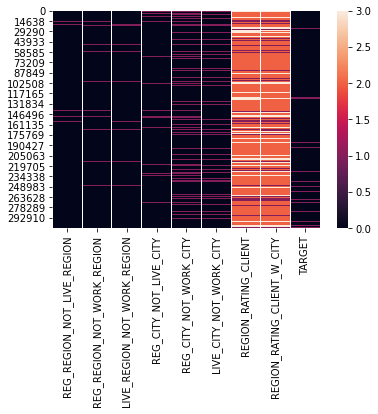

In [95]:
sns.heatmap(region_df)
plt.show()

Observations :
 - All the features are labeled as 0 and 1
 - `REG_REGION_NOT_LIVE_REGION` mostly contains 0, hence can be removed
 - `REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION` columns are identical, hence one of them can be removed
 - `REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY` columns are identical, hence one of them can be removed

In [96]:
unwanted = ['REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']
application_df.drop(labels=unwanted,axis=1,inplace=True)

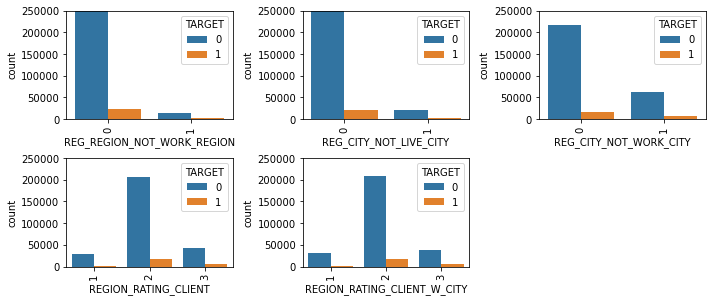

In [97]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

Observations :
 - Defaulter rate is highest when `REG_REGION_NOT_WORK_REGION=0` i.e. permanent address and working address is same.
 - Highest Applicants have Region rating of 2

In [98]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304418 non-null  int64   
 1   TARGET                       304418 non-null  int64   
 2   NAME_CONTRACT_TYPE           304418 non-null  object  
 3   CODE_GENDER                  304418 non-null  object  
 4   FLAG_OWN_CAR                 304418 non-null  object  
 5   FLAG_OWN_REALTY              304418 non-null  object  
 6   CNT_CHILDREN                 304418 non-null  int64   
 7   AMT_INCOME_TOTAL             304418 non-null  float64 
 8   AMT_CREDIT                   304418 non-null  float64 
 9   AMT_ANNUITY                  304418 non-null  float64 
 10  AMT_GOODS_PRICE              304418 non-null  float64 
 11  NAME_TYPE_SUITE              303140 non-null  object  
 12  NAME_INCOME_TYPE             304418 non-null

##### Contact Related Info

In [99]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

In [100]:
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              304418 non-null  int64  
 1   FLAG_EMP_PHONE          304418 non-null  int64  
 2   FLAG_WORK_PHONE         304418 non-null  int64  
 3   FLAG_CONT_MOBILE        304418 non-null  int64  
 4   FLAG_PHONE              304418 non-null  int64  
 5   FLAG_EMAIL              304418 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  304417 non-null  float64
 7   TARGET                  304418 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 30.9 MB


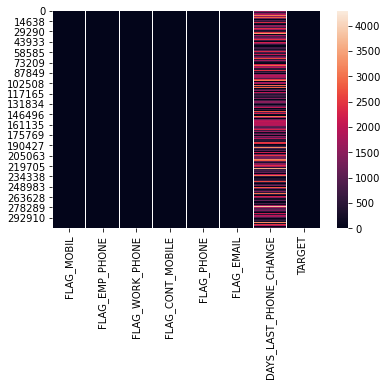

In [101]:
plt.figure()
sns.heatmap(contact_df)
plt.show()

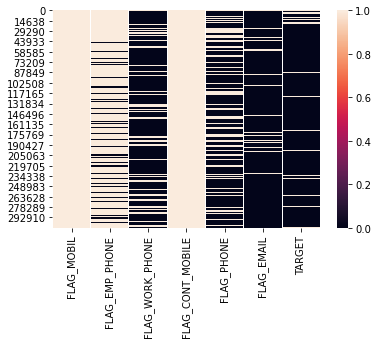

In [102]:
plt.figure()
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

Observations :
 - All the columns in contact_df are categorical (0 and 1)
 - No pattern/similarity of columns with Target column
 - Hence all of the columns can be removed

In [103]:
unwanted =['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE']

In [104]:
application_df.drop(labels=unwanted,axis=1,inplace=True)

In [105]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304418 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304418 non-null  int64   
 1   TARGET                       304418 non-null  int64   
 2   NAME_CONTRACT_TYPE           304418 non-null  object  
 3   CODE_GENDER                  304418 non-null  object  
 4   FLAG_OWN_CAR                 304418 non-null  object  
 5   FLAG_OWN_REALTY              304418 non-null  object  
 6   CNT_CHILDREN                 304418 non-null  int64   
 7   AMT_INCOME_TOTAL             304418 non-null  float64 
 8   AMT_CREDIT                   304418 non-null  float64 
 9   AMT_ANNUITY                  304418 non-null  float64 
 10  AMT_GOODS_PRICE              304418 non-null  float64 
 11  NAME_TYPE_SUITE              303140 non-null  object  
 12  NAME_INCOME_TYPE             304418 non-null

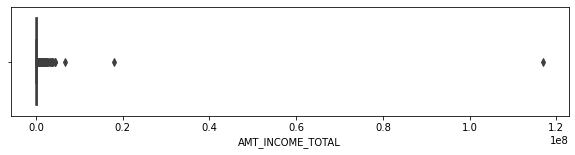

In [106]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers

plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()

In [107]:
print(application_df['AMT_INCOME_TOTAL'].describe(),"\n\n",application_df['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99]))

count    3.044180e+05
mean     1.669056e+05
std      2.347801e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64 

 0.50    144000.0
0.70    180000.0
0.90    270000.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [108]:
# Boxplot is showing the outliers for AMT_INCOME_TOTAL, there are few entries having very large annuity and downpayment than others.
# Considering this entries will mislead the average value of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_INCOME_TOTAL

application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'], 99)]

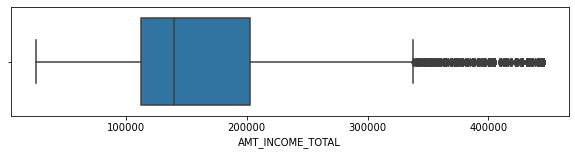

In [109]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()

In [110]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   299464 non-null  int64   
 1   TARGET                       299464 non-null  int64   
 2   NAME_CONTRACT_TYPE           299464 non-null  object  
 3   CODE_GENDER                  299464 non-null  object  
 4   FLAG_OWN_CAR                 299464 non-null  object  
 5   FLAG_OWN_REALTY              299464 non-null  object  
 6   CNT_CHILDREN                 299464 non-null  int64   
 7   AMT_INCOME_TOTAL             299464 non-null  float64 
 8   AMT_CREDIT                   299464 non-null  float64 
 9   AMT_ANNUITY                  299464 non-null  float64 
 10  AMT_GOODS_PRICE              299464 non-null  float64 
 11  NAME_TYPE_SUITE              298217 non-null  object  
 12  NAME_INCOME_TYPE             299464 non-null

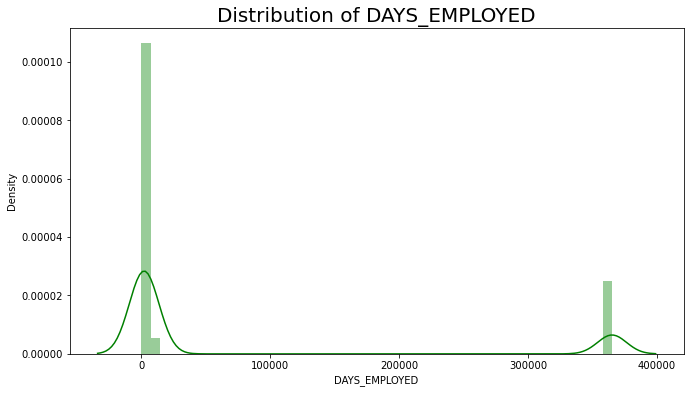

In [111]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize=[11,6])
sns.distplot(application_df['DAYS_EMPLOYED'], color="green" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

Observations :
 - Which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.
  - As it is not showing any pattern which will affect the loan disbursment hence will drop this column

In [112]:
unwanted = ["DAYS_EMPLOYED"]
application_df.drop(labels=unwanted,axis=1,inplace=True)

In [113]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   299464 non-null  int64   
 1   TARGET                       299464 non-null  int64   
 2   NAME_CONTRACT_TYPE           299464 non-null  object  
 3   CODE_GENDER                  299464 non-null  object  
 4   FLAG_OWN_CAR                 299464 non-null  object  
 5   FLAG_OWN_REALTY              299464 non-null  object  
 6   CNT_CHILDREN                 299464 non-null  int64   
 7   AMT_INCOME_TOTAL             299464 non-null  float64 
 8   AMT_CREDIT                   299464 non-null  float64 
 9   AMT_ANNUITY                  299464 non-null  float64 
 10  AMT_GOODS_PRICE              299464 non-null  float64 
 11  NAME_TYPE_SUITE              298217 non-null  object  
 12  NAME_INCOME_TYPE             299464 non-null

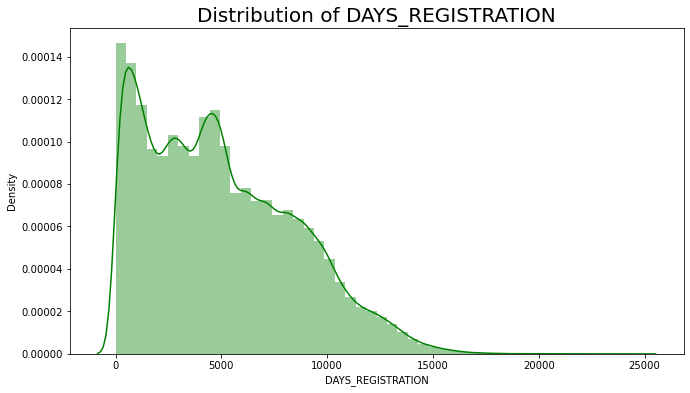

In [114]:
# distribution of 'DAYS_REGISTRATION'
plt.figure(figsize=[11,6])
sns.distplot(application_df['DAYS_REGISTRATION'], color="green" )
plt.title('Distribution of DAYS_REGISTRATION', fontdict={'fontsize':20} )
plt.show()

Observations :
 - The distribution not showing any pattern which will have impact on process of loan disbursment. Hence will drop it

In [115]:
unwanted = ["DAYS_REGISTRATION"]
application_df.drop(labels=unwanted,axis=1,inplace=True)

In [116]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   299464 non-null  int64   
 1   TARGET                       299464 non-null  int64   
 2   NAME_CONTRACT_TYPE           299464 non-null  object  
 3   CODE_GENDER                  299464 non-null  object  
 4   FLAG_OWN_CAR                 299464 non-null  object  
 5   FLAG_OWN_REALTY              299464 non-null  object  
 6   CNT_CHILDREN                 299464 non-null  int64   
 7   AMT_INCOME_TOTAL             299464 non-null  float64 
 8   AMT_CREDIT                   299464 non-null  float64 
 9   AMT_ANNUITY                  299464 non-null  float64 
 10  AMT_GOODS_PRICE              299464 non-null  float64 
 11  NAME_TYPE_SUITE              298217 non-null  object  
 12  NAME_INCOME_TYPE             299464 non-null

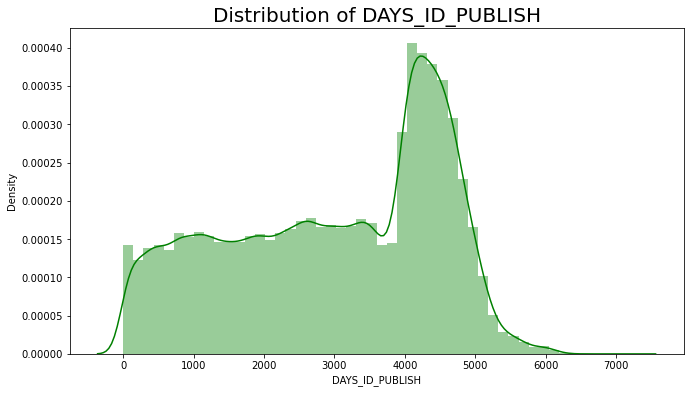

In [117]:
# distribution of 'DAYS_ID_PUBLISH'
plt.figure(figsize=[11,6])
sns.distplot(application_df['DAYS_ID_PUBLISH'], color="green" )
plt.title('Distribution of DAYS_ID_PUBLISH', fontdict={'fontsize':20} )
plt.show()

Observations :
 - The distribution not showing any pattern which will have impact on process of loan disbursment. Hence will drop it

In [118]:
unwanted = ["DAYS_ID_PUBLISH"]
application_df.drop(labels=unwanted,axis=1,inplace=True)

In [119]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   299464 non-null  int64   
 1   TARGET                       299464 non-null  int64   
 2   NAME_CONTRACT_TYPE           299464 non-null  object  
 3   CODE_GENDER                  299464 non-null  object  
 4   FLAG_OWN_CAR                 299464 non-null  object  
 5   FLAG_OWN_REALTY              299464 non-null  object  
 6   CNT_CHILDREN                 299464 non-null  int64   
 7   AMT_INCOME_TOTAL             299464 non-null  float64 
 8   AMT_CREDIT                   299464 non-null  float64 
 9   AMT_ANNUITY                  299464 non-null  float64 
 10  AMT_GOODS_PRICE              299464 non-null  float64 
 11  NAME_TYPE_SUITE              298217 non-null  object  
 12  NAME_INCOME_TYPE             299464 non-null

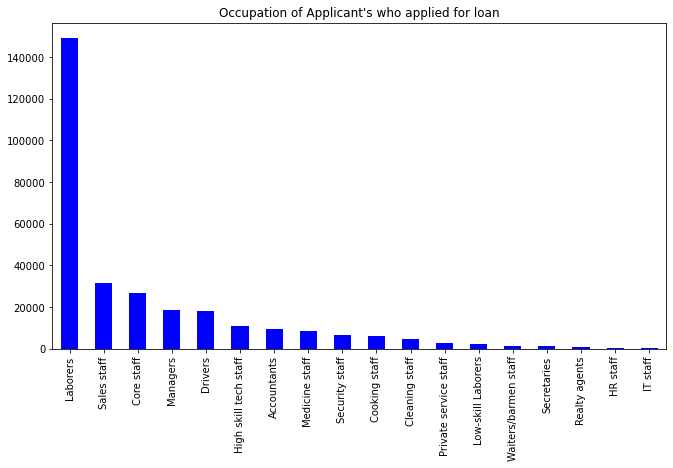

In [120]:
# Distribution of 'OCCUPATION_TYPE'
plt.figure(figsize=[11,6])
temp = application_df["OCCUPATION_TYPE"].value_counts()
temp.plot(kind='bar',title = 'Occupation of Applicant\'s who applied for loan', color = 'blue')
plt.show()

Observations :
 - We can observer that Labourers, Sales Staff and Core Staff constitute the majority whereas IT Staff is on the lower side.

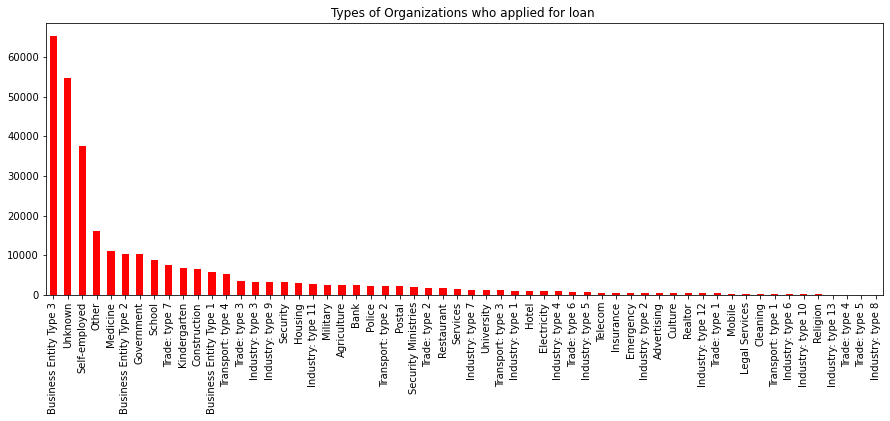

In [121]:
# Distribution of 'ORGANIZATION_TYPE'
plt.figure(figsize=[15,5])
temp = application_df["ORGANIZATION_TYPE"].value_counts()
temp.plot(kind='bar', title = 'Types of Organizations who applied for loan ', color = 'red')
plt.show()

Observations :
 - We can observe that Business Entity Type 3 organizations have majority of the loan applications.

In [122]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   299464 non-null  int64   
 1   TARGET                       299464 non-null  int64   
 2   NAME_CONTRACT_TYPE           299464 non-null  object  
 3   CODE_GENDER                  299464 non-null  object  
 4   FLAG_OWN_CAR                 299464 non-null  object  
 5   FLAG_OWN_REALTY              299464 non-null  object  
 6   CNT_CHILDREN                 299464 non-null  int64   
 7   AMT_INCOME_TOTAL             299464 non-null  float64 
 8   AMT_CREDIT                   299464 non-null  float64 
 9   AMT_ANNUITY                  299464 non-null  float64 
 10  AMT_GOODS_PRICE              299464 non-null  float64 
 11  NAME_TYPE_SUITE              298217 non-null  object  
 12  NAME_INCOME_TYPE             299464 non-null

##### Dividing the dataset into two different datasets based upon 'Target' value


In [123]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

default=application_df.loc[application_df["TARGET"]==1]
non_default=application_df.loc[application_df["TARGET"]==0]

### Univariate Analysis of Categorical Variables

##### Gender Distribution

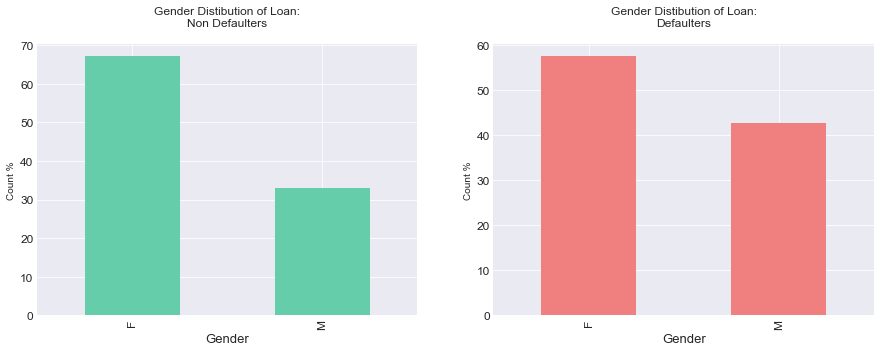

In [263]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["CODE_GENDER"].value_counts(normalize=True)*100).plot(kind='bar',title='Gender Distibution of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Gender",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["CODE_GENDER"].value_counts(normalize=True)*100).plot(kind='bar',title='Gender Distibution of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Gender",fontsize="13")
plt.ylabel("Count %")

plt.show()

In [125]:
defaulter_percentage(application_df, 'CODE_GENDER')

,Value,Percentage of Defaulter
0,M,10.303457
1,F,7.058989


Observations :
 - Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties.
 - Overall Default % is higher for Male Clients

##### Income Source

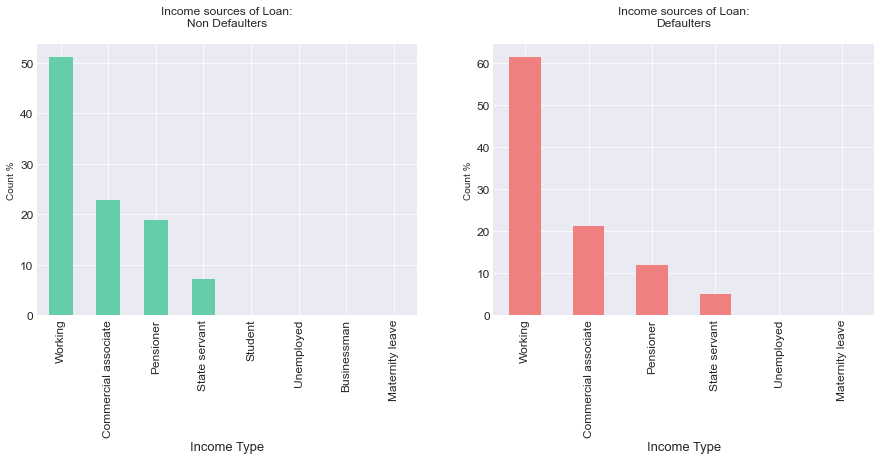

In [260]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_INCOME_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Income sources of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Income Type",fontsize="13")
plt.ylabel("Count %")

plt.subplot(1, 2, 2)
(default["NAME_INCOME_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Income sources of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Income Type",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations : 
 - We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared 

##### Family Status

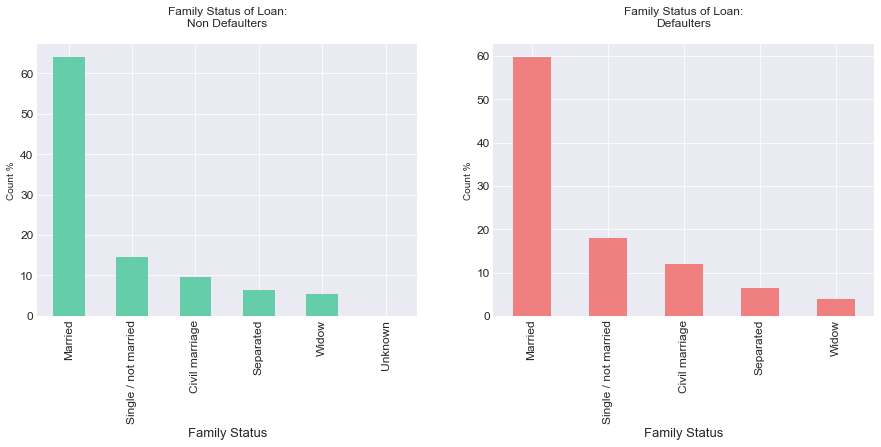

In [261]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100).plot(kind='bar',title='Family Status of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Family Status",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100).plot(kind='bar',title='Family Status of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Family Status",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations : 
 - We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties

##### Education

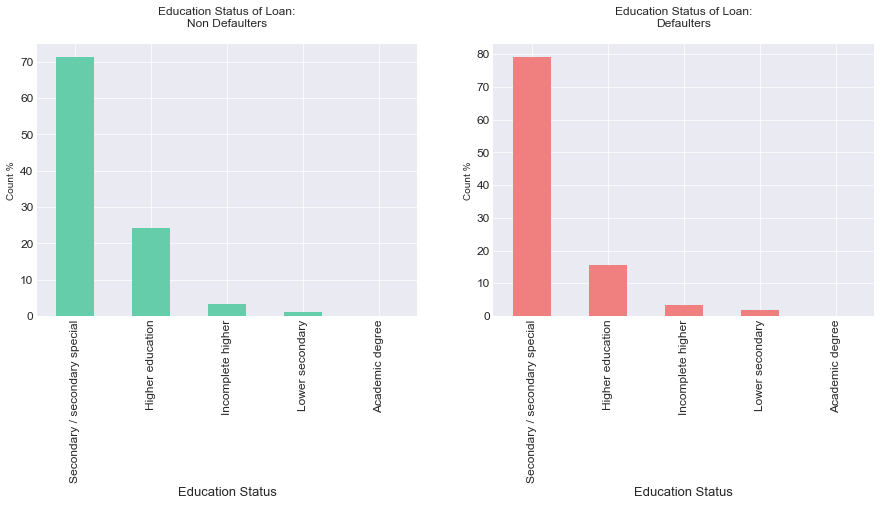

In [264]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Education Status of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Education Status",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Education Status of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Education Status",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties

##### Housing

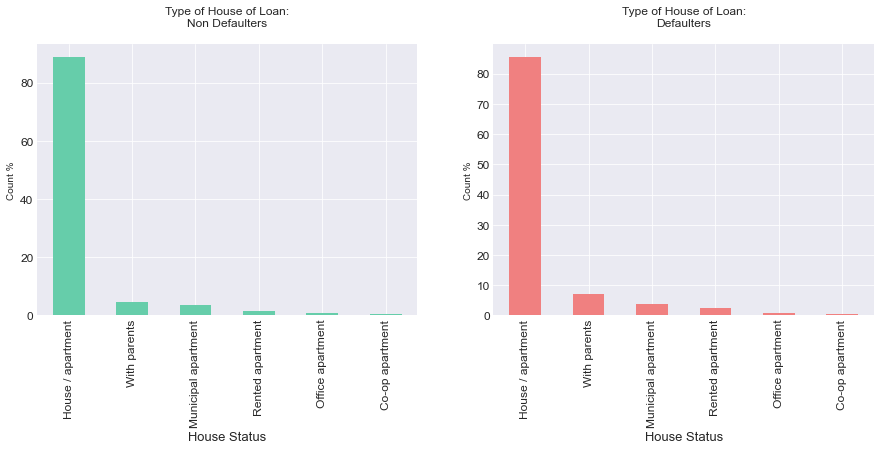

In [266]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Type of House of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("House Status",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Type of House of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("House Status",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

##### Income Range

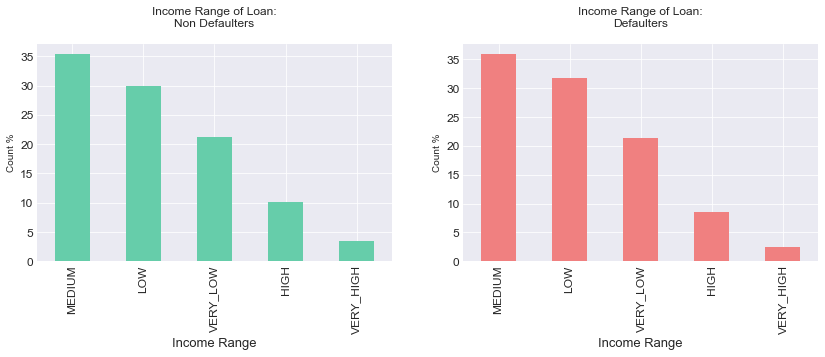

In [267]:
fig=plt.subplots(figsize=(14,4))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["AMT_INCOME_RANGE"].value_counts(normalize=True)*100).plot(kind='bar',title='Income Range of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Income Range",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["AMT_INCOME_RANGE"].value_counts(normalize=True)*100).plot(kind='bar',title='Income Range of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Income Range",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties

##### Age

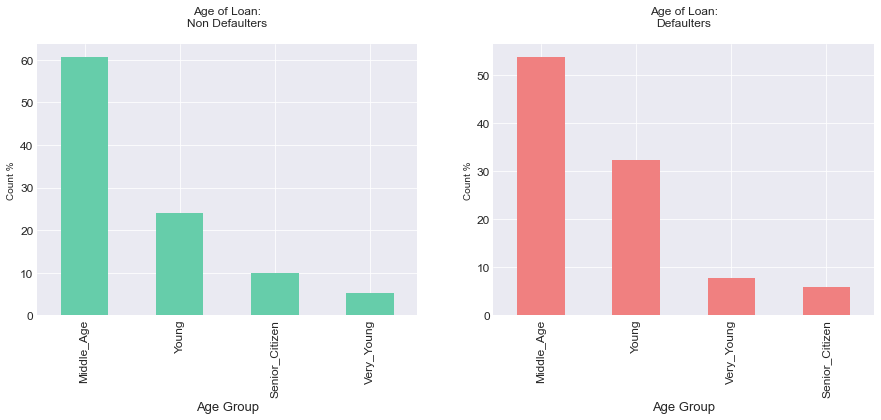

In [269]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["DAYS_BIRTH_BINS"].value_counts(normalize=True)*100).plot(kind='bar',title='Age of Loan:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Age Group",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["DAYS_BIRTH_BINS"].value_counts(normalize=True)*100).plot(kind='bar',title='Age of Loan:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Age Group",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We observe that there is an increase in the percentage of Loan Payment Difficulties who are young in age when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

##### Type of Loan

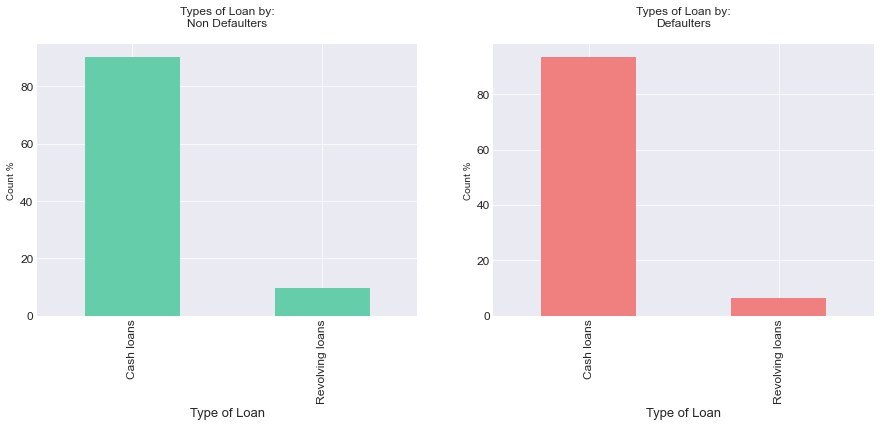

In [270]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Types of Loan by:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Type of Loan",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Types of Loan by:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Type of Loan",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans.

##### Accompanyed By

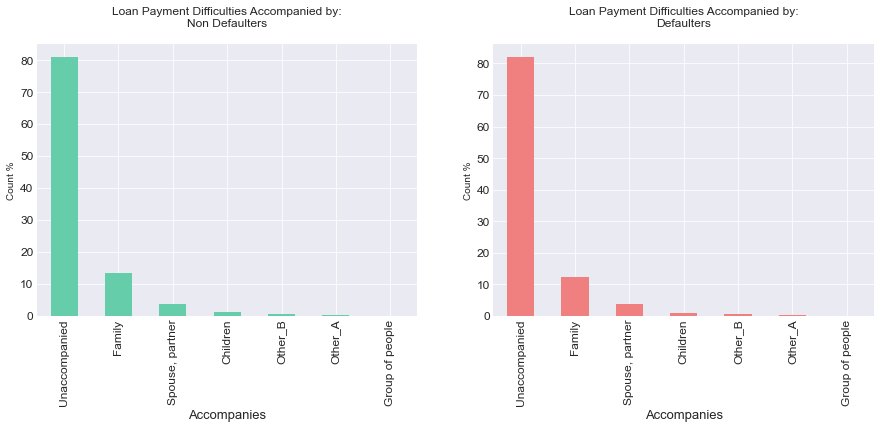

In [271]:
fig=plt.subplots(figsize=(15,5))

plt.subplots_adjust(hspace = 0.7)
plt.subplot(1, 2, 1)
(non_default["NAME_TYPE_SUITE"].value_counts(normalize=True)*100).plot(kind='bar',title='Loan Payment Difficulties Accompanied by:\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Accompanies",fontsize="13")
plt.ylabel("Count %")
plt.subplot(1, 2, 2)
(default["NAME_TYPE_SUITE"].value_counts(normalize=True)*100).plot(kind='bar',title='Loan Payment Difficulties Accompanied by:\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Accompanies",fontsize="13")
plt.ylabel("Count %")

plt.show()

Observations :
 - We do not observe any major changes here.

##### Organization Type

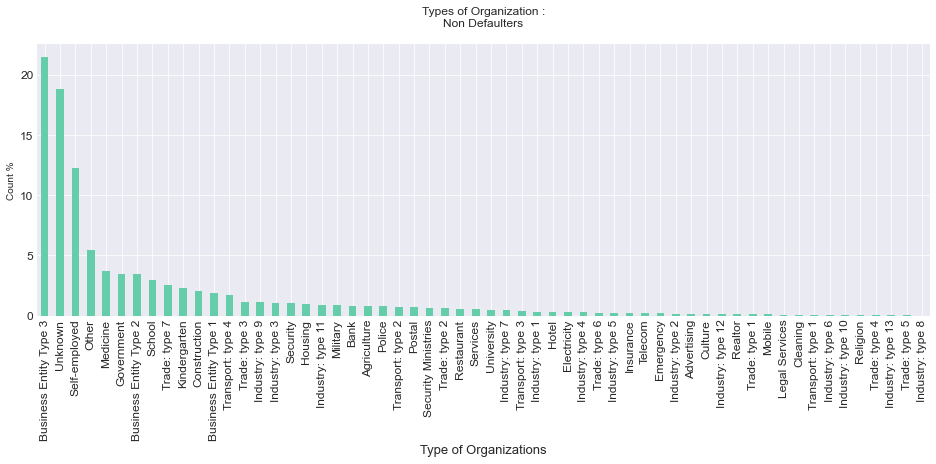

In [272]:
plt.figure(figsize=[16,5])
(non_default["ORGANIZATION_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Types of Organization :\nNon Defaulters\n',color="mediumaquamarine",fontsize="12")
plt.xlabel("Type of Organizations",fontsize="13")
plt.ylabel("Count %")
plt.show()

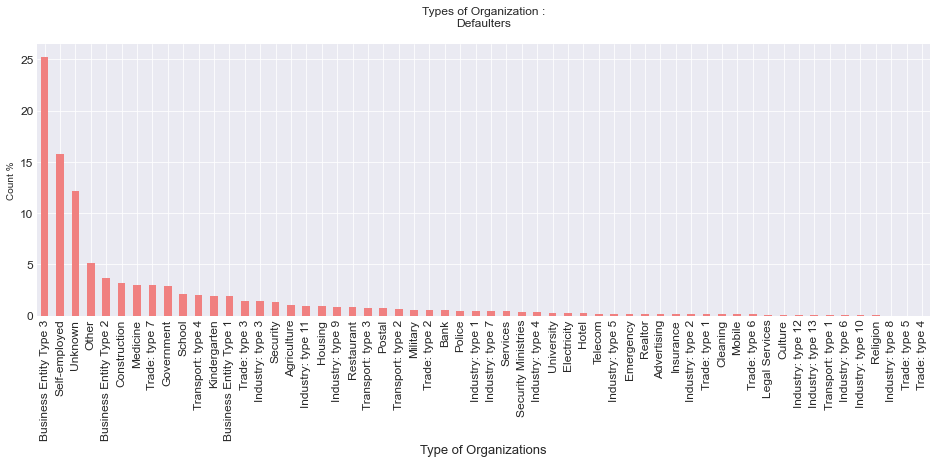

In [273]:
plt.figure(figsize=[16,5])
(default["ORGANIZATION_TYPE"].value_counts(normalize=True)*100).plot(kind='bar',title='Types of Organization :\nDefaulters\n',color="lightcoral",fontsize="12")
plt.xlabel("Type of Organizations",fontsize="13")
plt.ylabel("Count %")
plt.show()

Observations :
 - We observe that there is an increase in the percentage of Loan Payment Difficulties who are 'Self-Employed' in organization when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

##### Own Car Details

In [136]:
asset_df = application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']]
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FLAG_OWN_CAR     299464 non-null  object
 1   FLAG_OWN_REALTY  299464 non-null  object
 2   TARGET           299464 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [137]:
asset_df["FLAG_OWN_CAR"].value_counts()

N    199567
Y     99897
Name: FLAG_OWN_CAR, dtype: int64

In [138]:
asset_df["FLAG_OWN_REALTY"].value_counts()

Y    207672
N     91792
Name: FLAG_OWN_REALTY, dtype: int64

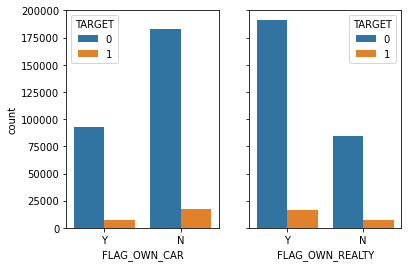

In [139]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(asset_df['FLAG_OWN_CAR'], hue=asset_df['TARGET'], order=['Y','N'], ax=ax1)

g1 = sns.countplot(asset_df['FLAG_OWN_REALTY'], hue=asset_df['TARGET'], order=['Y','N'], ax=ax2)
g1.set(yticklabels=[])  # remove the tick labels
g1.set(ylabel=None)  # remove the axis label

plt.show()

In [140]:
defaulter_percentage(asset_df, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.540490
1,Y,7.377599


In [141]:
defaulter_percentage(asset_df, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.409230
0,Y,8.039119


Observations :
 - Maximum Clients `Own Realty`.
 - Maximum Clients donot `Own Car`
 - Default case is approx 8% in case of clients not owning realty or car

##### Family Information

In [142]:
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299464 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        299464 non-null  int64  
 1   CNT_FAM_MEMBERS     299463 non-null  float64
 2   NAME_FAMILY_STATUS  299464 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 19.1+ MB


In [143]:
# dropping 1 row with null value in CNT_FAM_MEMBERS
application_df = application_df.dropna(subset=['CNT_FAM_MEMBERS']) 
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        299463 non-null  int64  
 1   CNT_FAM_MEMBERS     299463 non-null  float64
 2   NAME_FAMILY_STATUS  299463 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.1+ MB


In [144]:
# Family member cannot have fraction, converting to Integer
application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)
application_df['CNT_FAM_MEMBERS'].dtype

dtype('int32')

In [145]:
application_df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CNT_CHILDREN        299463 non-null  int64 
 1   CNT_FAM_MEMBERS     299463 non-null  int32 
 2   NAME_FAMILY_STATUS  299463 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 8.0+ MB


In [146]:
#checking number of counts

print("CNT_CHILDREN\n")
print(application_df["CNT_CHILDREN"].value_counts())
print("-----------------------------------------")
print("\n\nCNT_FAM_MEMBERS\n")
print(application_df["CNT_FAM_MEMBERS"].value_counts())
print("-----------------------------------------")
print("\n\nNAME_FAMILY_STATUS\n")
print(application_df["NAME_FAMILY_STATUS"].value_counts())
print("-----------------------------------------")

CNT_CHILDREN

0     210035
1      59399
2      25931
3       3569
4        406
5         81
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
-----------------------------------------


CNT_FAM_MEMBERS

2     154109
1      66498
3      51094
4      23921
5       3337
6        386
7         78
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64
-----------------------------------------


NAME_FAMILY_STATUS

Married                 190679
Single / not married     44401
Civil marriage           29153
Separated                19304
Widow                    15926
Name: NAME_FAMILY_STATUS, dtype: int64
-----------------------------------------


In [147]:
# checking % of defaulters
defaulter_percentage(application_df, 'CNT_CHILDREN')

,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,13.300493
3,3.0,9.722611
1,1.0,9.042240
2,2.0,8.831129
0,0.0,7.778227
6,5.0,7.407407
5,7.0,0.000000


In [148]:
# checking % of defaulters
defaulter_percentage(application_df, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.989637
4,5.0,9.469583
2,3.0,8.871883
3,4.0,8.762175
0,1.0,8.400253
1,2.0,7.666652


In [149]:
# checking % of defaulters
defaulter_percentage(application_df, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,10.022982
0,Single / not married,9.898426
4,Separated,8.205553
1,Married,7.646883
3,Widow,5.852066


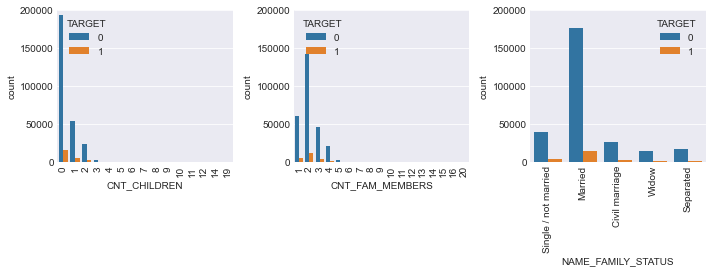

In [291]:
#checking the countplot for each column
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 8.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()
    
plt.show()

Observations :
 - Default rate is highest for `Civil Marriage` and `Single clients`.
 - Maximum clients are married with family members as 2 and 0 children.
 - As the number of children increases default percentage increases.
 - As the number of family members increases default percentage increases.

Note :
 - In some cases it has been observed that where the count of children/family member is high, default % is either very high or very low. This shows the imabalance in the dataset as the clients with very high count in family members ther total count in dataset is low thereby cannot be taken as conclusion.

##### Occupation Type

In [151]:
application_df['OCCUPATION_TYPE'].value_counts()

Laborers                 149026
Sales staff               31638
Core staff                26799
Managers                  18707
Drivers                   18209
High skill tech staff     11030
Accountants                9378
Medicine staff             8441
Security staff             6661
Cooking staff              5909
Cleaning staff             4630
Private service staff      2569
Low-skill Laborers         2085
Waiters/barmen staff       1342
Secretaries                1276
Realty agents               735
HR staff                    540
IT staff                    488
Name: OCCUPATION_TYPE, dtype: int64

In [152]:
defaulter_percentage(application_df, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
13,Low-skill Laborers,17.170264
4,Drivers,11.417431
12,Waiters/barmen staff,11.326379
10,Security staff,10.779162
7,Cooking staff,10.475546
5,Sales staff,9.694039
6,Cleaning staff,9.568035
0,Laborers,8.043563
14,Realty agents,8.027211
15,Secretaries,7.210031


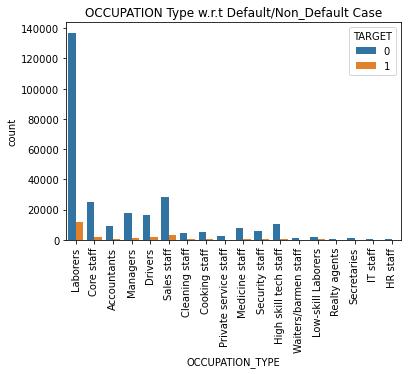

In [153]:
plt.figure()
sns.countplot(application_df['OCCUPATION_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("OCCUPATION Type w.r.t Default/Non_Default Case")
plt.show()

Observations :
 -  Maximum clients occupation is `Laboerers` as its count is high.
 -  Default % is high for `Low-skill Laborers` occupation of client as compared to other occupations.

##### On which day of the week did the client apply for the loan

In [154]:
defaulter_percentage(application_df, 'WEEKDAY_APPR_PROCESS_START')

,Value,Percentage of Defaulter
6,TUESDAY,8.411464
5,FRIDAY,8.257554
0,WEDNESDAY,8.237855
2,THURSDAY,8.156259
3,SUNDAY,8.068304
4,SATURDAY,7.974477
1,MONDAY,7.828360


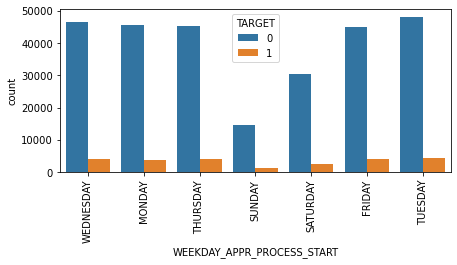

In [155]:
plt.figure(figsize=[7,3])
sns.countplot(application_df["WEEKDAY_APPR_PROCESS_START"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.show()

Observations :
 - All weekdays have similar number of applicants than weekend(Saturday and Sunday)

### Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

##### Income and Annuity

AMT_INCOME_TOTAL


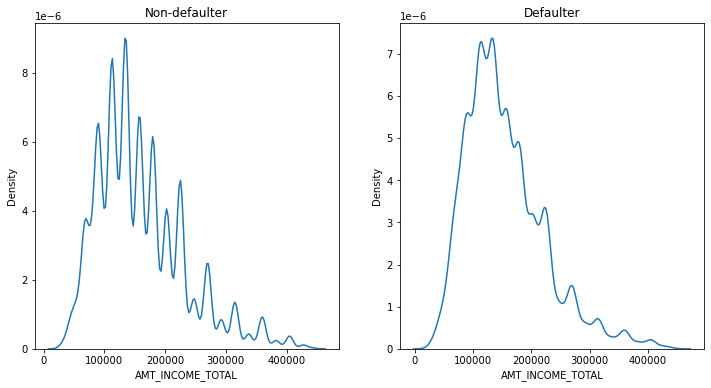

AMT_ANNUITY


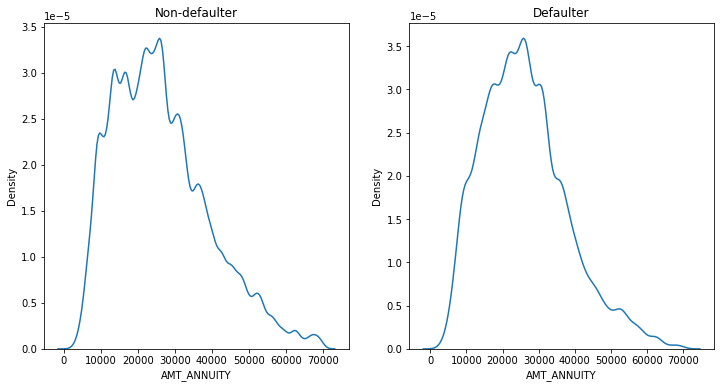

In [156]:
print("AMT_INCOME_TOTAL")
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()



print("AMT_ANNUITY")
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

Observations :
 - AMT_INCOME_TOTAL
     - As the client's income increases, default rate decreases
 - AMT_ANNUITY
   - Quite similer distribution for both Defaulter and Non Defaulter 

##### Amount Credit and Amount Goods Price

<Figure size 720x576 with 0 Axes>

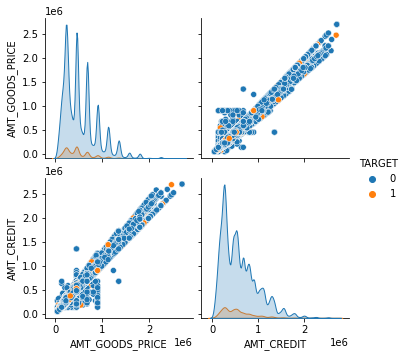

In [157]:
# To check the relation between amount credit and amount goods price

plt.figure(figsize=[10,8])
sns.pairplot(data=application_df,vars=["AMT_GOODS_PRICE","AMT_CREDIT"],hue="TARGET")
plt.show()

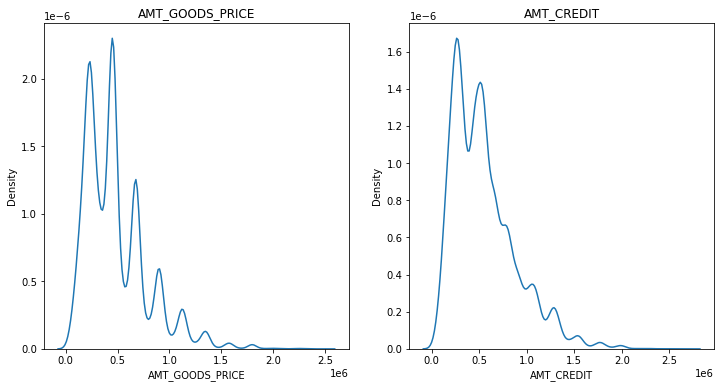

In [158]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="AMT_GOODS_PRICE")
ax2 = fig.add_subplot(1, 2, 2, title="AMT_CREDIT")
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_GOODS_PRICE'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.show()

Observations :
 - `AMT_CREDIT` and `AMT_GOODS_PRICE` have linear relation.
 - For lower range of `AMT_CREDIT` and `AMT_GOODS_PRICE`, default rate is high but amount of defaulters is less as distribution is narrow.

### Bivariate Analysis

#### Bivariate Analysis of Categorical vs Numerical Variables

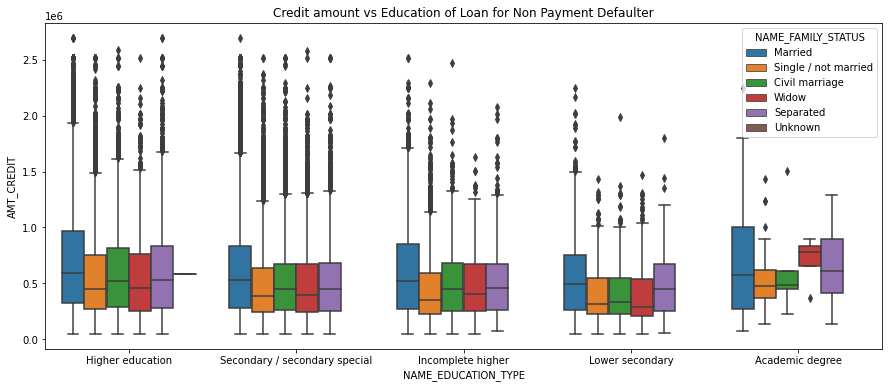

In [159]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties

plt.figure(figsize=[15,6])
plt.title("Credit amount vs Education of Loan for Non Payment Defaulter")
sns.boxplot(data=non_default,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS")
plt.show()

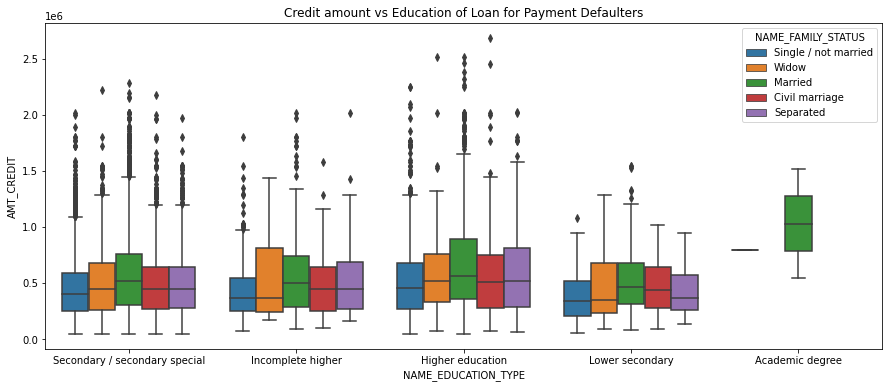

In [160]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan Payment Difficulties

plt.figure(figsize=[15,6])
plt.title("Credit amount vs Education of Loan for Payment Defaulters")
sns.boxplot(data=default,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS")
plt.show()

Observations :
 - The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties apperas to be similar. We observe that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

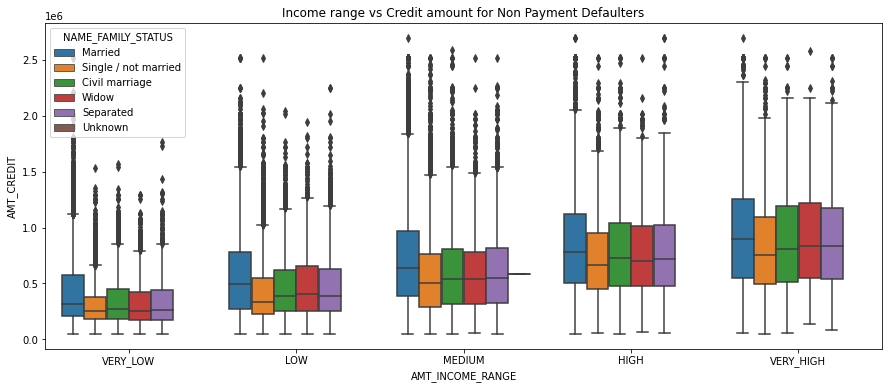

In [161]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize=[15,6])
plt.title("Income range vs Credit amount for Non Payment Defaulters")
sns.boxplot(data=non_default,x="AMT_INCOME_RANGE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS")
plt.show()

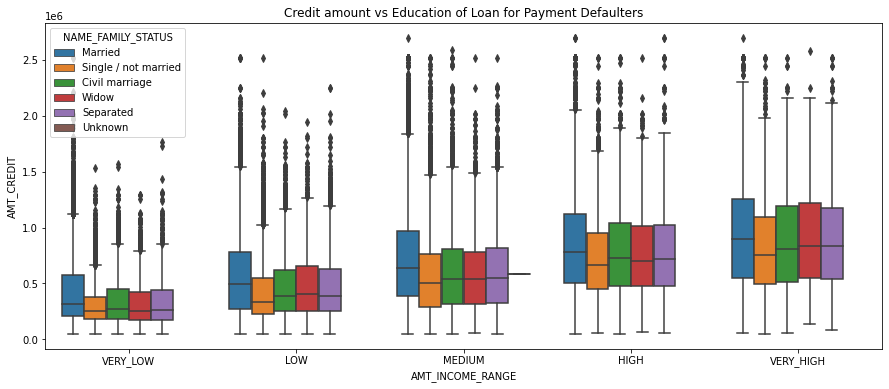

In [162]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize=[15,6])
plt.title("Credit amount vs Education of Loan for Payment Defaulters")
sns.boxplot(data=non_default,x="AMT_INCOME_RANGE",y="AMT_CREDIT",hue="NAME_FAMILY_STATUS")
plt.show()

Observations :
 - The graphs for Loan Payment Difficulties and Loan- Non Payment Difficulties apperas to be similar. We observe that Family status of 'single', 'seperated' and 'married' of income range veryhigh are having higher number of credits than others.

### Bivariate Analysis of Categorical-Categorical

In [163]:
table= pd.pivot_table(application_df, values='TARGET', index=['CODE_GENDER','AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
table

NAME_EDUCATION_TYPE           Academic degree  Higher education  Incomplete higher  Lower secondary  Secondary / secondary special
CODE_GENDER AMT_INCOME_RANGE                                                                                                      
F           VERY_LOW                 0.000000          0.055954           0.086399         0.080271                       0.076729
            LOW                      0.000000          0.048882           0.080340         0.114206                       0.079530
            MEDIUM                   0.000000          0.050563           0.078257         0.097403                       0.076118
            HIGH                     0.071429          0.041831           0.077329         0.044118                       0.071437
            VERY_HIGH                0.181818          0.041266           0.081395         0.000000                       0.072107
M           VERY_LOW                 0.000000          0.080411           0.123967         0.125000                       0.118089
            LOW                      0.000000          0.073346           0.096882         0.143451                       0.123830
            MEDIUM                   0.000000          0.070729           0.095836         0.150206                       0.113625
            HIGH                     0.000000          0.055804           0.075332         0.086022                       0.094277
            VERY_HIGH                0.000000          0.048060           0.081897         0.105263                       0.084774

Observations :
 - From Female and Male category Clients LOWER SECONDARY education have maximum % of Loan-Payment Difficulties.
 - In Females, it comes under Income Range : Low
 - In Males, it comes under Income Range : Medium

###### Income Type

In [164]:
defaulter_percentage(application_df,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,50.000000
4,Unemployed,36.363636
0,Working,9.645269
2,Commercial associate,7.644967
1,State servant,5.834838
3,Pensioner,5.406542
5,Student,0.000000
6,Businessman,0.000000


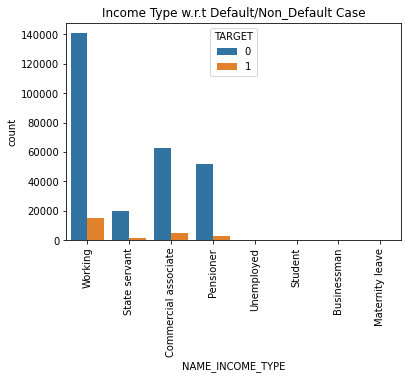

In [165]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type w.r.t Default/Non_Default Case")
plt.show()

Observations:
   - Maximum number of clients in dataset are `Working`.
   - Deafult rate is high for clients who are `Unemployed` or are on `Matrenity leave`
   
Note :
 - As datset is highly imbalanced, which lead to less applications in dataset for `Unemployed,Businessman,Student and Maternity leave` thereby will not be right to take in as contribution in analysis.

###### Income Range

In [166]:
defaulter_percentage(application_df,'AMT_INCOME_RANGE')

,Value,Percentage of Defaulter
3,LOW,8.611615
0,MEDIUM,8.265399
2,VERY_LOW,8.202413
1,HIGH,6.908509
4,VERY_HIGH,6.239968


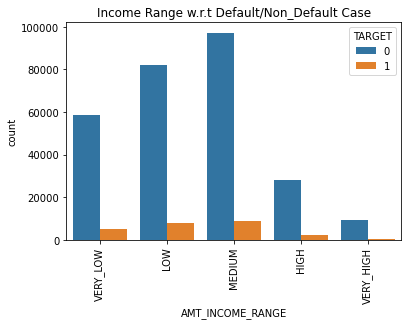

In [167]:
plt.figure()
sns.countplot(application_df['AMT_INCOME_RANGE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Range w.r.t Default/Non_Default Case")
plt.show()

Observations :
 - From the plot above we can say that clients with 'LOW' Income range have maximum % of Loan-Payment Difficulties.

##### Contract Type

In [168]:
defaulter_percentage(application_df,'NAME_CONTRACT_TYPE')

,Value,Percentage of Defaulter
0,Cash loans,8.420055
1,Revolving loans,5.588745


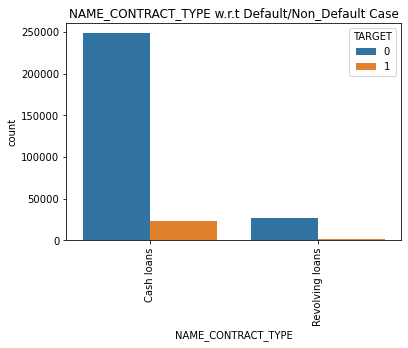

In [169]:
plt.figure()
sns.countplot(application_df['NAME_CONTRACT_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("NAME_CONTRACT_TYPE w.r.t Default/Non_Default Case")
plt.show()

Observations:
 - Number Cash loans is quite higher than Revolving Loans
 - Clients with 'Cash loans' contract type have maximum % of Loan-Payemnt Difficulties.

##### Education Type

In [170]:
defaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.984949
0,Secondary / secondary special,8.967471
2,Incomplete higher,8.542461
1,Higher education,5.458248
4,Academic degree,2.068966


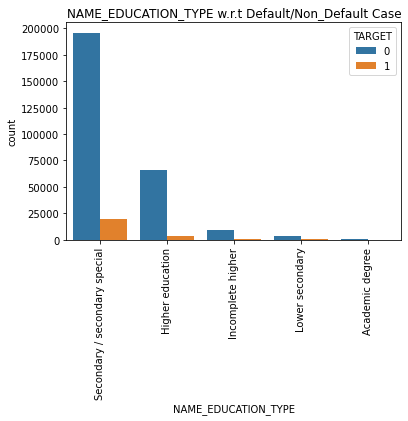

In [171]:
plt.figure()
sns.countplot(application_df['NAME_EDUCATION_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("NAME_EDUCATION_TYPE w.r.t Default/Non_Default Case")
plt.show()

Observations :
 - Clients with 'Lower secondary' education type have maximum % of Loan-Payment Difficulties.
 - Maximum clients are from Secondary/ secondary special and Higher Education background.
 - Default rate is quite low for Higher Education clients.

### Bivariate Analysis of Numerical-Numerical

In [172]:
# Heatmap for Loan- Non Payment Difficulties
res = non_default[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT',]].corr(method = 'pearson')
res

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.385542,0.786131,0.986231
AMT_INCOME_TOTAL,0.385542,1.000000,0.453381,0.383176
AMT_ANNUITY,0.786131,0.453381,1.000000,0.786816
AMT_CREDIT,0.986231,0.383176,0.786816,1.000000


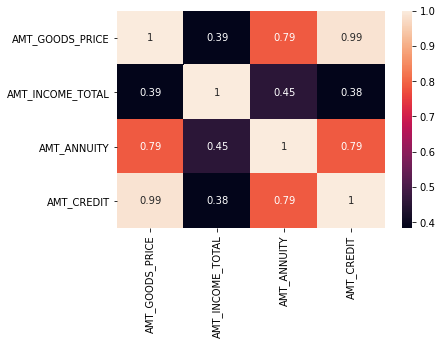

In [173]:
sns.heatmap(res, annot=True)
plt.show()

In [174]:
# Heatmap for Loan- Non Payment Difficulties
res = default[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT',]].corr(method = 'pearson')
res

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.338301,0.753462,0.982050
AMT_INCOME_TOTAL,0.338301,1.000000,0.414203,0.339093
AMT_ANNUITY,0.753462,0.414203,1.000000,0.757027
AMT_CREDIT,0.982050,0.339093,0.757027,1.000000


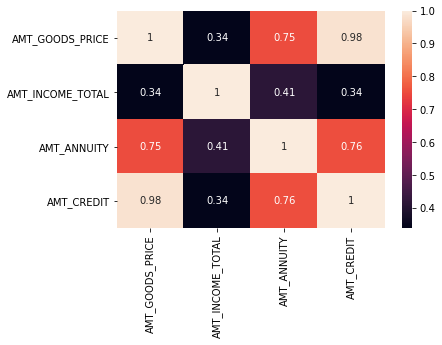

In [175]:
sns.heatmap(res, annot=True)
plt.show()

Observations :
 - We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

##### Score from External Data Source

In [176]:
application_df[['EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_2  298814 non-null  float64
 1   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(2)
memory usage: 16.9 MB


In [177]:
application_df[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,2.988140e+05,240038.000000
mean,5.121097e-01,0.510843
std,1.912778e-01,0.194880
min,8.173617e-08,0.000527
25%,3.888098e-01,0.370650
50%,5.634807e-01,0.535276
75%,6.617584e-01,0.669057
max,8.549997e-01,0.896010


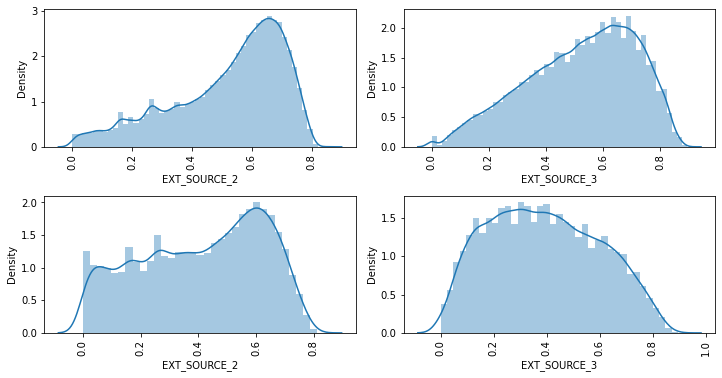

In [178]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3','EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 2:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_df[application_df["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

Observations :
 - `EXT_SOURCE_2` has quite similer distribution for non defaulters and defaulter.
     - Plus, no more decription or info is present for this feature. Thereby dropping it will not affect the further analysis.
 - `EXT_SOURCE_3` have very different distribution for defaulters and non-defaulters.

##### Top 10 correlation for Defaulters

In [179]:
defaulter_corr = default.corr()
round(defaulter_corr, 2)

corr_list = defaulter_corr.unstack()

In [180]:
# Listing the correlations in pair sorted in descending order
corr_list.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998262
AMT_CREDIT                   AMT_GOODS_PRICE               0.982050
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.957471
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.884929
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.868664
AMT_CREDIT                   AMT_ANNUITY                   0.757027
AMT_ANNUITY                  AMT_GOODS_PRICE               0.753462
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY        0.471793
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.414203
AMT_CREDIT                   AMT_INCOME_TOTAL              0.339093
dtype: float64

##### Top 10 Correlation for Non-defaulters

In [181]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack()

In [182]:
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998511
AMT_CREDIT                  AMT_GOODS_PRICE                0.986231
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949916
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.877817
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859919
AMT_CREDIT                  AMT_ANNUITY                    0.786816
AMT_ANNUITY                 AMT_GOODS_PRICE                0.786131
                            AMT_INCOME_TOTAL               0.453381
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.435861
AMT_INCOME_TOTAL            AMT_GOODS_PRICE                0.385542
dtype: float64

### EDA for Previous Application Data Frame

In [183]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


###### Checking number of features and their datatype in dataframe

In [184]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [185]:
print("Previous Application Dataset :")
print("Rows : ", prev_ap_df.shape[0])
print("Columns : ", prev_ap_df.shape[1])

Previous Application Dataset :
Rows :  1670214
Columns :  37


Observations :
- Previous Application Data Frame :
     - 37 features
     - 1670214 rows
     - Out of that 15 features are float64, 6 features are integer, 16 features are object datatype.

In [186]:
# Will search for additional columns and common columns in application_df and prev_ap_df

common_col = prev_ap_df.columns.intersection(application_df.columns)
additional_col = application_df.columns.difference(prev_ap_df.columns)
        
print("Additional Columns are : ", len(additional_col)) #print number of additional columns
print("\nCommon Columns are : ", len(common_col))  #print number of common columns
print("\nList of Common Columns is : \n", common_col) #print the list of common columns

Additional Columns are :  35

Common Columns are :  8

List of Common Columns is : 
 Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE'], dtype='object')


Observation :
 - `SK_ID_CURR` i.e. **ID OF LOAN** is an unique identifier, which will use to merge the relevant columns of 2 dataframes.
 - **Note :** If required further in analysis

##### Data Cleaning

In [187]:
# Function_name : NaN_per
# Usage : To return % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing features having missing values and % of missing values in those features

def NaN_per(df):
    missing = pd.DataFrame(columns=['features','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = ((df[col].isna().sum()/df.shape[0])*100).round(2)
            missing = missing.append({'features' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [188]:
NaN_prev = NaN_per(prev_ap_df)

In [189]:
NaN_prev.sort_values('percentage', ascending=False)

,features,percentage
5,RATE_INTEREST_PRIMARY,99.64
6,RATE_INTEREST_PRIVILEGED,99.64
2,AMT_DOWN_PAYMENT,53.64
4,RATE_DOWN_PAYMENT,53.64
7,NAME_TYPE_SUITE,49.12
10,DAYS_FIRST_DRAWING,40.30
11,DAYS_FIRST_DUE,40.30
12,DAYS_LAST_DUE_1ST_VERSION,40.30
13,DAYS_LAST_DUE,40.30
14,DAYS_TERMINATION,40.30


Observation: 

 - There are 16 features in `prev_app_df` that have missing values.
 - Will drop the features like
     - `RATE_INTEREST_PRIMARY`
     - `RATE_INTEREST_PRIVILEGED` as 99% data is missing in these 2 features.
     - Plus we cannot do anything about these 2 features as most of the data is missing in these features
 
 - Dropping rows containing missing values for the features like
     - `AMT_CREDIT`
     - `PRODUCT_COMBINATION` as they have very low % of missing data. Thereby dropping entries would not cause impact the analysis as percentage of missing value is very low.

In [190]:
prev_ap_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
prev_ap_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
prev_ap_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


Note :
 - As there are many features which are categorical and some are numeric, analysis technique cannot be same for both.
 - Thereby will extract the numeric features and perform analysis like **(correlation, distribution, outliers)** to find useful insights.

In [191]:
# Extracting the numeric features from previous application data

numeric_features = prev_ap_df.select_dtypes(include=np.number).columns.tolist()

print(numeric_features)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [192]:
prev_num_df=prev_ap_df[numeric_features]
prev_num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1669867 non-null  int64  
 1   SK_ID_CURR                 1669867 non-null  int64  
 2   AMT_ANNUITY                1297978 non-null  float64
 3   AMT_APPLICATION            1669867 non-null  float64
 4   AMT_CREDIT                 1669867 non-null  float64
 5   AMT_DOWN_PAYMENT           774370 non-null   float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START    1669867 non-null  int64  
 8   NFLAG_LAST_APPL_IN_DAY     1669867 non-null  int64  
 9   RATE_DOWN_PAYMENT          774370 non-null   float64
 10  DAYS_DECISION              1669867 non-null  int64  
 11  SELLERPLACE_AREA           1669867 non-null  int64  
 12  CNT_PAYMENT                1297983 non-null  float64
 13  DAYS_FIRST_D

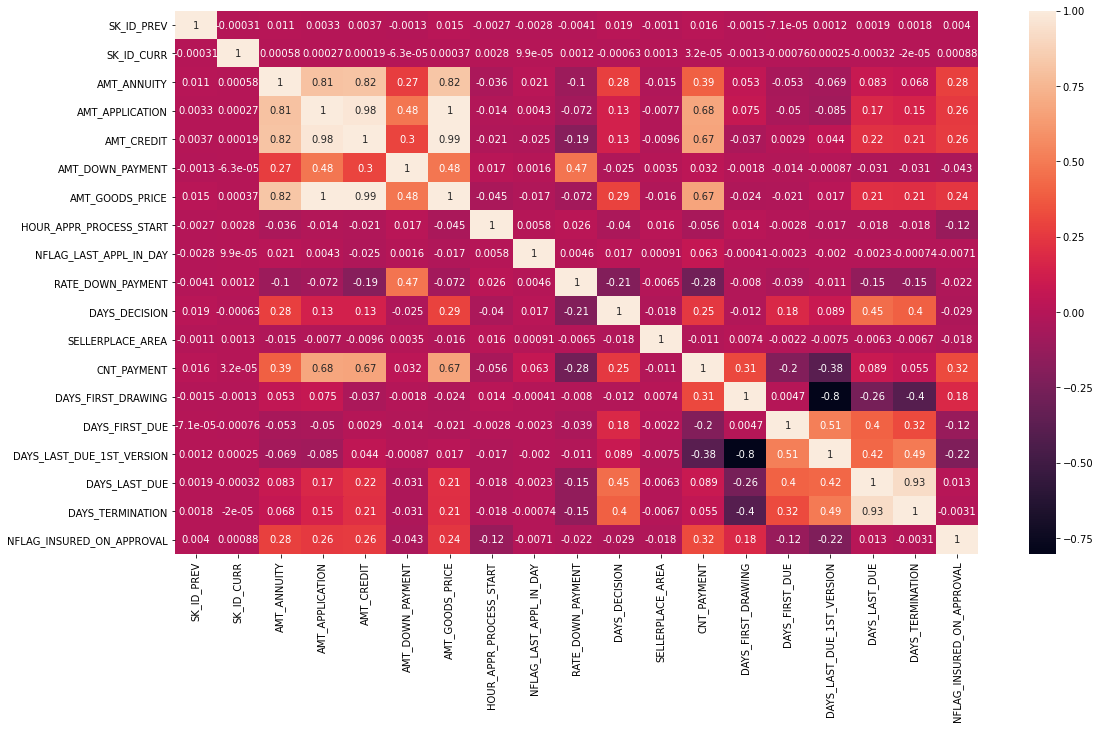

In [193]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(prev_num_df.corr(), annot=True)
plt.show()

Observations :
 - `DAYS_LAST_DUE` and `DAYS_TERMINATION` are highly correlated
 - `DAYS_FIRST_DRAWING` and `DAYS_LAST_DUE_1st_VERSION` have high negative correlation
 - `AMT_ANNUITY` , `AMT_APPLICATION` , `AMT_CREDIT` , `AMT_GOODS_PRICE` are highly correlated
 
Note :
 - As we can see multiple features are highly correlated i.e. **Multicollinearity**

In [194]:
prev_ap_df.drop(['SK_ID_PREV'], axis=1, inplace=True)  #will drop this column as it doesnot shows any importance in further analysis

# plus this is a unique identifier column and its unique for each row plus it will not help us in merging datframe.

In [195]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

##### Data Imputation

In [196]:
print(prev_ap_df['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


In [197]:
prev_ap_df['NAME_TYPE_SUITE'].isnull().values.any() #this particular column has missing values

True

In [198]:
#will extract the 'type suite' which has maximum value using the mode
prev_ap_df["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [199]:
# As we can see that most people comes under 'Unaccompanied' category will fill the missing values with this column
# Filling missing value as 'Unaccompanied' as most common value

prev_ap_df['NAME_TYPE_SUITE'].fillna(prev_ap_df["NAME_TYPE_SUITE"].mode()[0], inplace=True)

##### Merging Data Frames

In [200]:
# Merging only required columns of application_data with previous_application_data
# Taking only 'Target' column as it is present only in application_df and not in prev_ap_df
# Adding to it, 'Target' column will help us to get idea about the history of each client.

prev_ap_merged = pd.merge(application_df[['SK_ID_CURR', 'TARGET']], prev_ap_df, how='left', on=['SK_ID_CURR'])

prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395187 entries, 0 to 1395186
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1395187 non-null  int64  
 1   TARGET                       1395187 non-null  int64  
 2   NAME_CONTRACT_TYPE           1379999 non-null  object 
 3   AMT_ANNUITY                  1080303 non-null  float64
 4   AMT_APPLICATION              1379999 non-null  float64
 5   AMT_CREDIT                   1379999 non-null  float64
 6   AMT_DOWN_PAYMENT             649053 non-null   float64
 7   AMT_GOODS_PRICE              1068463 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1379999 non-null  object 
 9   HOUR_APPR_PROCESS_START      1379999 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1379999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1379999 non-null  float64
 12  RATE_DOWN_PAYMENT            649053 non-nu

In [201]:
# Checking on the numeric data

prev_ap_merged.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.395187e+06,1.395187e+06,1.080303e+06,1.379999e+06,1.379999e+06,6.490530e+05,1.068463e+06,1.379999e+06,1.379999e+06,649053.000000,1.379999e+06,1.379999e+06,1.080308e+06,833082.000000,833082.000000,833082.000000,833082.000000,833082.000000,833082.000000
mean,2.784658e+05,8.676256e-02,1.553712e+04,1.719696e+05,1.929638e+05,6.499479e+03,2.221433e+05,1.246162e+01,9.964362e-01,0.079866,-8.797335e+02,3.145597e+02,1.605233e+01,342262.411501,13500.321022,33269.870175,76987.021667,82662.759182,0.330717
std,1.028140e+05,2.814869e-01,1.413975e+04,2.865601e+05,3.124851e+05,1.971680e+04,3.081173e+05,3.324187e+00,5.959088e-02,0.107511,7.836826e+02,7.785949e+03,1.456095e+01,88823.450082,71676.202913,106153.761415,149930.952579,153738.206450,0.470471
min,1.000020e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893020e+05,0.000000e+00,6.198885e+03,1.975050e+04,2.474550e+04,0.000000e+00,4.945500e+04,1.000000e+01,1.000000e+00,0.000000,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1245.000000,-1316.000000,-1269.000000,0.000000
50%,2.790110e+05,0.000000e+00,1.108795e+04,6.988500e+04,7.955550e+04,1.750500e+03,1.082115e+05,1.200000e+01,1.000000e+00,0.061953,-5.810000e+02,4.000000e+00,1.200000e+01,365243.000000,-824.000000,-357.000000,-533.000000,-493.000000,0.000000
75%,3.674870e+05,0.000000e+00,2.016693e+04,1.800000e+05,2.097000e+05,7.605000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,-2.700000e+02,8.500000e+01,2.400000e+01,365243.000000,-406.000000,136.000000,-72.000000,-40.000000,1.000000
max,4.562550e+05,1.000000e+00,4.180581e+05,4.455000e+06,4.104351e+06,3.060045e+06,4.455000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


##### Handling Outliers

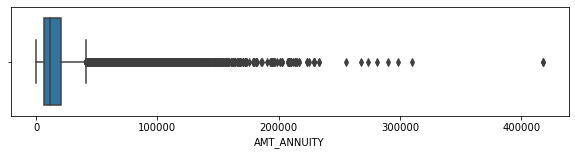

In [202]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

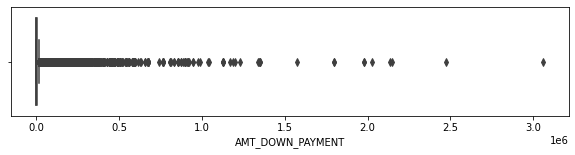

In [203]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [204]:
# Boxplot is showing the outliers for downpayment and annuity, there are few entries having very large annuity and downpayment than others.
# Considering this entries will mislead the average value of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_ANNUITY'] < np.nanpercentile(prev_ap_merged['AMT_ANNUITY'], 99)]
prev_ap_merged = prev_ap_merged[prev_ap_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(prev_ap_merged['AMT_DOWN_PAYMENT'], 99)]

Checking the features after updating.

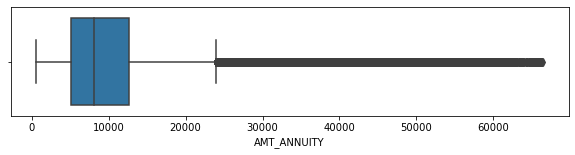

In [205]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_ANNUITY'])
plt.show()

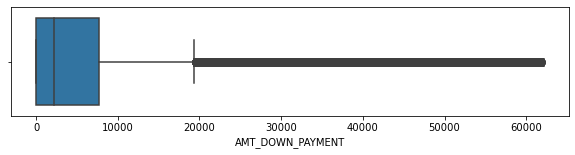

In [206]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged['AMT_DOWN_PAYMENT'])
plt.show()

###### Checking Data Imbalance in Previous Application Data

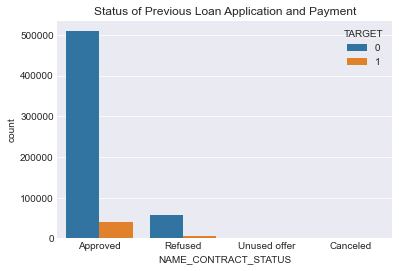

In [207]:
plt.style.use("seaborn-darkgrid")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(prev_ap_merged['NAME_CONTRACT_STATUS'], hue=prev_ap_merged['TARGET'])
plt.show()

Observations :
 - The data is highly imbalance
 - Majority of the loans were approved in past and very few are refused and quite null in terms of unused and canceled.

In [208]:
# Percentage of previously approved loan applicants that defaulted in current loan

total_approved = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = prev_ap_merged[(prev_ap_merged['TARGET'] == 1) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  7.394371961301095


In [209]:
# Percentage of previously refused loan applicants that were able to pay current loan

total_refused = prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = prev_ap_merged[(prev_ap_merged['TARGET'] == 0) & (prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  90.11543096340458


Observation:
 - The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected.

 - 7% of the previously approved loan applicants that defaulted in current loan

 - 90 % of the previously refused loan applicants that were able to pay current loan

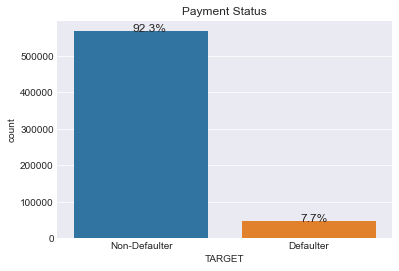

In [210]:
plt.title("Payment Status")
bar=sns.countplot(prev_ap_merged['TARGET'])
bar.set_xticklabels(['Non-Defaulter','Defaulter'])
total = len(prev_ap_merged["TARGET"])
for p in bar.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    bar.annotate(percentage, (x, y), size = 12)
plt.show()

Observation :
 - This data is highly imbalanced as number of defaulter is very less in total population.

In [211]:
prev_ap_merged.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    613920
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

Observation : 
 - 'FLAG_LAST_APPL_PER_CONTRACT' can be dropped for having fixed value in all entries.

In [212]:
prev_ap_merged.NFLAG_LAST_APPL_IN_DAY.value_counts()

1.0    613697
0.0       223
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

Observation :
 - 'NFLAG_LAST_APPL_IN_DAY' can be dropped for having highly imbalance data.

In [213]:
unwanted =["FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]
prev_ap_merged.drop(labels=unwanted,axis=1,inplace=True)

In [214]:
prev_ap_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613920 entries, 0 to 1395186
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  613920 non-null  int64  
 1   TARGET                      613920 non-null  int64  
 2   NAME_CONTRACT_TYPE          613920 non-null  object 
 3   AMT_ANNUITY                 613920 non-null  float64
 4   AMT_APPLICATION             613920 non-null  float64
 5   AMT_CREDIT                  613920 non-null  float64
 6   AMT_DOWN_PAYMENT            613920 non-null  float64
 7   AMT_GOODS_PRICE             613920 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START  613920 non-null  object 
 9   HOUR_APPR_PROCESS_START     613920 non-null  float64
 10  RATE_DOWN_PAYMENT           613920 non-null  float64
 11  NAME_CASH_LOAN_PURPOSE      613920 non-null  object 
 12  NAME_CONTRACT_STATUS        613920 non-null  object 
 13  DAYS_DECISION

##### Univariate, Bivariate and Multivariate Analysis

##### Univariate, Bivariate and Multivariate Analysis : Analysis of Numeric Features of Previous Application Data

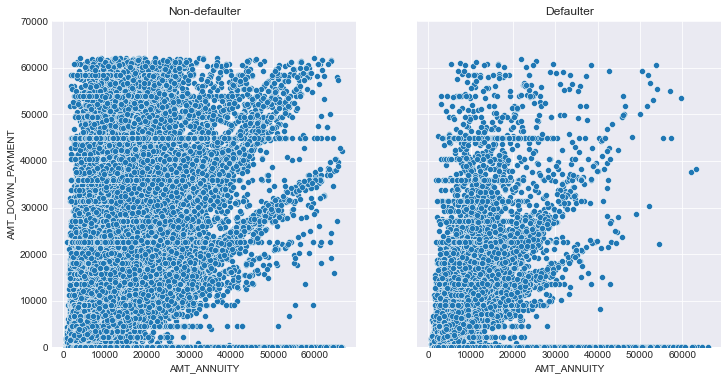

In [215]:
# Setting equal y-limit for both sub-plots for better comparison

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)

g1 = sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_ANNUITY'], prev_ap_merged[prev_ap_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)
g1.set(yticklabels=[])  # remove the tick labels
g1.set(ylabel=None)  # remove the axis label

plt.show()

Observations :
 - The number of defaulters are getting less as the Amount of Annuity increases of previous application.
 - As amount of down payment increases i.e. higher the downpayment less chances of getting default.

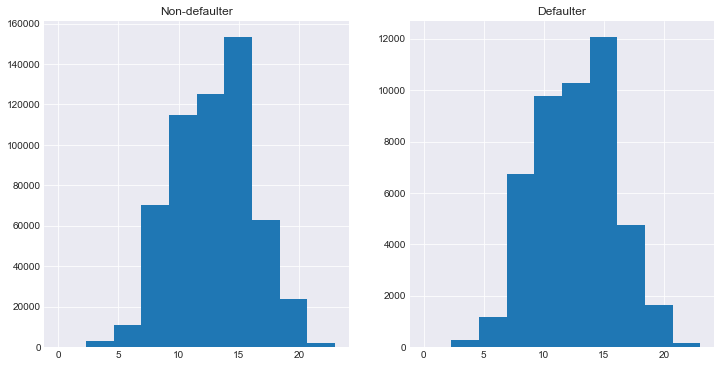

In [216]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

prev_ap_merged[prev_ap_merged["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
prev_ap_merged[prev_ap_merged["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()

Observations :
 - Most of the loans are applied around 15:00 hours. This feature is does not have visible impact on TARGET variable

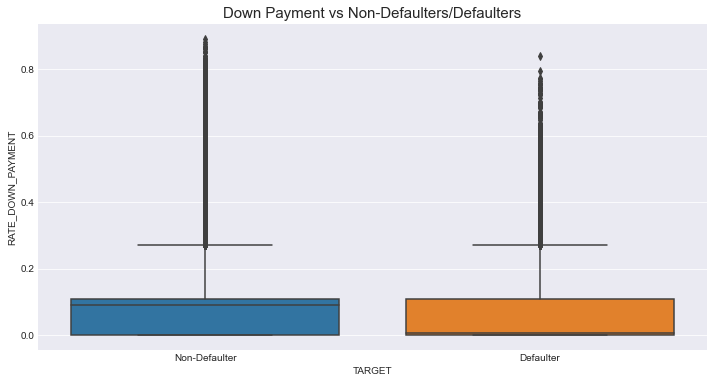

In [217]:
fig = plt.figure(figsize=(12,6))
box=sns.boxplot(y=prev_ap_merged['RATE_DOWN_PAYMENT'],x=prev_ap_merged['TARGET'])
box.set_xticklabels(['Non-Defaulter','Defaulter'])
box.set_title("Down Payment vs Non-Defaulters/Defaulters",fontsize=15)
plt.show()

Checking the quantile values for exact percentile

In [218]:
# Percentile of RATE_DOWN_PAYMENT for non-defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.090552
0.70    0.108909
0.90    0.211858
0.95    0.280102
0.99    0.495188
Name: RATE_DOWN_PAYMENT, dtype: float64

In [219]:
# Percentile of RATE_DOWN_PAYMENT for defaulters

prev_ap_merged[prev_ap_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.007104
0.70    0.104258
0.90    0.198923
0.95    0.230414
0.99    0.448499
Name: RATE_DOWN_PAYMENT, dtype: float64

Observations :
 - For those who had lower rate of down payment in previous application, cases of default are higher.

##### Univariate, Bivariate and Multivariate Analysis : Analysis of Categorical Features of Previous Application Data

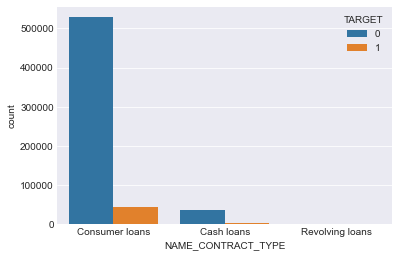

In [220]:
sns.countplot(prev_ap_merged.NAME_CONTRACT_TYPE, hue=prev_ap_merged.TARGET)
plt.show()

Observations :
 - Highest number of loans are applied for Consumer Loans

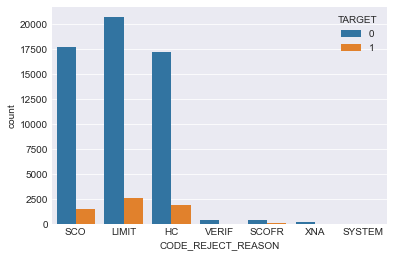

In [221]:
sns.countplot(prev_ap_merged[prev_ap_merged['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=prev_ap_merged.TARGET)
plt.show()

Observations :
 - `SCO` , `LIMIT` and `HC` are the most common reason of rejection.

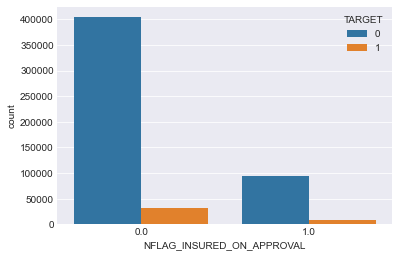

In [222]:
sns.countplot(prev_ap_merged['NFLAG_INSURED_ON_APPROVAL'], hue=prev_ap_merged['TARGET'])
plt.show()

Observations :
 - Most of the people did not request insurance during previous loan application.

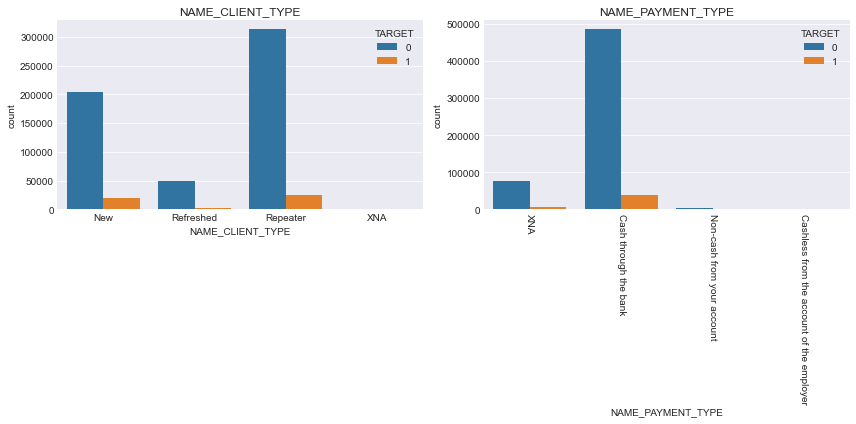

In [223]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="NAME_CLIENT_TYPE")
ax2 = fig.add_subplot(1, 2, 2, title="NAME_PAYMENT_TYPE")

sns.countplot(prev_ap_merged['NAME_CLIENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax1)
sns.countplot(prev_ap_merged['NAME_PAYMENT_TYPE'], hue=prev_ap_merged['TARGET'], ax=ax2)
plt.xticks(rotation=-90)

plt.tight_layout()

plt.show()

Observations :
 - Most of the applicants are `repeater`
 - `Cash through the bank` is the most frequently used payment method

In [224]:
# For calculating total % of defaulters in previous application bases on [NAME_GOODS_CATEGORY]

def defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [225]:
defaulter_percentage(prev_ap_merged, 'NAME_GOODS_CATEGORY')

,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.246227
17,Auto Accessories,9.162935
14,Jewelry,9.103613
3,Mobile,8.651399
20,Weapon,8.196721
15,Office Appliances,8.189880
8,Computers,8.132949
21,Direct Sales,7.812500
5,Audio/Video,7.734280


Observations :
 - Highest percentage of default cases are for the applicants who previously applied for Insurance and Vehicles

In [226]:
defaulter_percentage(prev_ap_merged, 'NAME_PORTFOLIO')

,Value,Percentage of Defaulter
2,Cards,17.214700
0,POS,7.707610
1,Cash,6.410974
3,Cars,0.000000


Observations :
 - For Cards defaulter rate is highest.

In [227]:
defaulter_percentage(prev_ap_merged, 'NAME_PRODUCT_TYPE')

,Value,Percentage of Defaulter
1,walk-in,9.305748
0,XNA,7.707489
2,x-sell,6.038647


Observations :
 - From all the walk-in applicants defaulter rate is highest.

In [228]:
defaulter_percentage(prev_ap_merged, 'CHANNEL_TYPE')

,Value,Percentage of Defaulter
4,AP+ (Cash loan),13.559322
1,Country-wide,7.960713
2,Regional / Local,7.601718
0,Stone,7.311507
3,Credit and cash offices,6.162610
5,Contact center,4.761905
6,Car dealer,0.000000


Observations :
 - 15% loan applicatiant defaulted for AP+ (Cash Loan)

In [229]:
defaulter_percentage(prev_ap_merged, 'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.700602
9,Jewelry,9.036743
3,Connectivity,8.817762
2,Consumer electronics,7.493599
7,Industry,7.236623
4,Construction,6.613176
5,XNA,6.265718
1,Furniture,5.946378
6,Clothing,5.931870
8,Tourism,4.659498


Observations :
 - In seller Industry `Auto technology` has highest rate of defaulter
 - `MLM partners` has lowest number of defaulters

In [230]:
prev_ap_merged.NAME_YIELD_GROUP.value_counts()

high          226877
middle        177881
low_normal    150066
low_action     57028
XNA             2068
Name: NAME_YIELD_GROUP, dtype: int64

In [231]:
prev_ap_merged.NAME_YIELD_GROUP.mode()

0    high
dtype: object

In [232]:
# Imputing the value'XNA' which means not available for the column 'NAME_YIELD_GROUP'
# Replacing XNA value with 'High'
prev_ap_merged.loc[prev_ap_merged.NAME_YIELD_GROUP == 'XNA','NAME_YIELD_GROUP'] = 'high'
prev_ap_merged.NAME_YIELD_GROUP.value_counts()

high          228945
middle        177881
low_normal    150066
low_action     57028
Name: NAME_YIELD_GROUP, dtype: int64

In [233]:
defaulter_percentage(prev_ap_merged, 'NAME_YIELD_GROUP')

,Value,Percentage of Defaulter
2,high,8.456179
1,middle,7.593279
0,low_normal,6.888969
3,low_action,6.663393


Observations :
 - Defaulter percentage is highest where NAME_YIELD_GROUP is 'high'.

In [234]:
defaulter_percentage(prev_ap_merged, 'PRODUCT_COMBINATION')

,Value,Percentage of Defaulter
13,Card Street,17.291768
4,POS mobile with interest,8.799451
0,POS other with interest,7.983494
3,POS mobile without interest,7.907820
2,POS household with interest,7.789692
11,POS others without interest,7.286064
5,POS household without interest,6.704586
15,Card X-Sell,6.666667
9,Cash Street: middle,6.548673
10,Cash Street: high,6.431234


Observations :
 - Highest percentage of default cases is for Card Street

## Previous Application Conclusion:

 - There are feature columns in the dataset that are highly correlated to each other. Which means both will have similar impact on the target value. Those features can be removed before feeding this data to a model to avoid collinearity.

 - Feature columns with 50% or more missing data can be dropped.

 - This dataset is highly imbalanced

 - The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected. `NAME_CONTRACT_STATUS` is an important feature.

 - 7% of the previously approved loan applicants that defaulted in current loan
 - 90 % of the previously refused loan applicants that were able to pay current loan
 - `SCO`, `LIMIT` and `HC` are the most common reason of rejection.

 - Most of the people did not request insurance during previous loan application.

 - For `Cards` defaulter percentage is highest (17%). `NAME_PORTFOLIO` is an important feature for analyzing 'TARGET' variable.

 - 15% loan applicatiant defaulted for `AP+ (Cash Loan)`. `CHANNEL_TYPE` is an important feature for analyzing 'TARGET' variable.

 - Highest percentage (17%) of default cases is for `Card Street`. `PRODUCT_COMBINATION` is an important driving factor.

## Application DataFrame Conclusion
 - The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.
 - The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.
 - The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.
 
 -----------------------------------------------------------------------------------------------------------------------------
 -----------------------------------------------------------------------------------------------------------------------------
 
 #### Top 10 Correlations for Defaulters
 
1. AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
2. OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998262
3. AMT_CREDIT                   AMT_GOODS_PRICE               0.982050
4. REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.957471
5. CNT_FAM_MEMBERS              CNT_CHILDREN                  0.884929
6. DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.868664
7. AMT_CREDIT                   AMT_ANNUITY                   0.757027
8. AMT_ANNUITY                  AMT_GOODS_PRICE               0.753462
9. REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY        0.471793
10. AMT_ANNUITY                 AMT_INCOME_TOTAL              0.414203

 #### Top 10 Correlations for Non - Defaulters

1. AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
2. OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998511
3. AMT_CREDIT                  AMT_GOODS_PRICE                0.986231
4. REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949916
5. CNT_FAM_MEMBERS             CNT_CHILDREN                   0.877817
6. DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859919
7. AMT_CREDIT                  AMT_ANNUITY                    0.786816
8. AMT_ANNUITY                 AMT_GOODS_PRICE                0.786131
9. REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.435861
10. AMT_INCOME_TOTAL           AMT_GOODS_PRICE                0.385542

 -----------------------------------------------------------------------------------------------------------------------------
 -----------------------------------------------------------------------------------------------------------------------------
 
 ##### Top 5 important columns

###### Family Info:
 - Important driving features : 'CNT_FAM_MEMBERS', 'CNT_CHILDREN'
     - Most of the clients are married (and/or) no children (and/or) 2 family members.
     - Clients with relatively more number of children (and/or) family members have higher default percentage. (For some of the cases where count children/family members is high, and the default rate is very high or very low. This cases cannot be considered for analysis as number of applicants having a large family is very low.)

###### Education and Occupation Info: 
 - Important driving features :'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'
     - Most of the clients are working.
     - Clients on Maternity Leave and Unemployed has highest percentage of Defaulter
     - Businessman have lowest (0) percentage of Defaulter However clients of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

##### CODE_GENDER
 - Female clients are more than male clients
 - Defauter percentage is higher for male clients
 - XNA values can be replaced with "Female"

##### DAYS_BIRTH
 - Changed the column stats in 'years' from this gave useful information.
 - There is an increase in the percentage of Loan Payment Difficulties who are young in age when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties. 
 - Default cases are less for Senior Citizens
 
##### EXT_SOURCE_3'
 - Have very different distribution for defaulters and non-defaulters. This can be important features.
 
 -----------------------------------------------------------------------------------------------------------------------------
 -----------------------------------------------------------------------------------------------------------------------------
 
 ### Summary :
 - This data is highly imbalanced as number of defaulter is very less in total population.
 - 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, and 'EXT_SOURCE_3' are some of the important driving factors.

 - **Documents** : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment. Majority of the applicants did not submit any documents apart from DOCUMENT_3. FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.

 - **Housing:** Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that
   - Most of the applicants live in House/Apartment
   - Applicants living with their parents or in rented apartment have higher rate of default.

 - **Social Circle Info:** The features show similar trend for defaulters and nondefalters, can be dropped.

 - **Regional Info:**
   - Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same

 - **Contact Info :**
   - Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.

 - **Asset Info :**
   - Most of the clients own realty
   - Most of the clients do not own cars
   - People not owning reality and car and have a slightly higher default rate than the people who own reality and car

 - **Organization Type :**
     - There is an increase in the percentage of Loan Payment Difficulties who are 'Self-Employed' in organization when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

 - **Occupation Type :**
     - Default % high for 'Low-skill Laborers' as compared to other Occupation Types

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

-------------------------------------------------------------------------------`**End Of Note Book**`----------------------------------------------------------------------------------------------

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**